# Feature Engineering Notebook

## Objectives

* Engineer features for Regression models

## Inputs

* **outputs/datasets/cleaned/TrainSetCleaned.csv**
* **outputs/datasets/cleaned/TestSetCleaned.csv**

## Outputs

* To generate a list of variables to engineer.


## Additional Comments

* Feature Engineering Transformers:

  * Categorical encoder:
    * BsmtExposure
    * BsmtFinType1
    *  GarageFinish
    * KitchenQual

  * Numerical transformation (as there is a lot of numerical data, we want those measured in feet/square feet, and SalePrice)
    * 1stFlrSF
    * 2ndFlrSF
    * GrLivArea
    * BsmtFinSF1
    * BsmtUnfSF
    * TotalBsmtSF
    * GarageArea
    * LotArea
    * LotFrontage
    * OpenPorchSF
    * MasVnrArea
    * SalePrice

  * Outlier winsoriser: (as there is a lot of numerical data, we want those measured in feet/square feet, and SalePrice)
    * 1stFlrSF
    * 2ndFlrSF
    * GrLivArea
    * BsmtFinSF1
    * BsmtUnfSF
    * TotalBsmtSF
    * GarageArea
    * LotArea
    * LotFrontage
    * MasVnrArea
    * SalePrice
    
  * Smart Correlation selection:
    
    * All variables except SalePrice


---

# Change working directory

We need to change the working directory from its current folder to its parent folder

  * We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/hertiage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory

* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/hertiage-housing'

---

# Load Cleaned Data

Train Set:

In [4]:
import pandas as pd
train_set = "outputs/datasets/cleaned/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set)
TrainSet.head(5)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      1828       0.0           3.0           Av          48          Unf   
1       894       0.0           2.0           No           0          Unf   
2       964       0.0           2.0           No         713          ALQ   
3      1689       0.0           3.0           No        1218          GLQ   
4      1541       0.0           3.0           No           0          Unf   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0       1774         774          Unf       2007.0  ...    11694        90.0   
1        894         308          Unf       1962.0  ...     6600        60.0   
2        163         432          Unf       1921.0  ...    13360        80.0   
3        350         857          RFn       2002.0  ...    13265        69.0   
4       1541         843          RFn       2001.0  ...    13704       118.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0       452.0          108            5            9         1822       2007   
1         0.0            0            5            5          894       1962   
2         0.0            0            7            5          876       1921   
3       148.0           59            5            8         1568       2002   
4       150.0           81            5            7         1541       2001   

   YearRemodAdd  SalePrice  
0          2007     314813  
1          1962     109500  
2          2006     163500  
3          2002     271000  
4          2002     205000  

[5 rows x 22 columns]

Checking for missing values:

In [5]:
missing_vars_train = TrainSet.columns[TrainSet.isna().sum() > 0].to_list()
missing_vars_train

[]

Test Set:

In [6]:
test_set = "outputs/datasets/cleaned/TestSetCleaned.csv"
TestSet = pd.read_csv(test_set)
TestSet.head(5)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0      2515       0.0           4.0           No        1219          Rec   
1       958     620.0           3.0           No         403          BLQ   
2       979     224.0           3.0           No         185          LwQ   
3      1156     866.0           4.0           No         392          BLQ   
4       525       0.0           3.0           No           0          Unf   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        816         484          Unf       1975.0  ...    32668        69.0   
1        238         240          Unf       1941.0  ...     9490        79.0   
2        524         352          Unf       1950.0  ...     7015        69.0   
3        768         505          Fin       1977.0  ...    10005        83.0   
4        525         264          Unf       1971.0  ...     1680        21.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0         0.0            0            3            6         2035       1957   
1         0.0            0            7            6          806       1941   
2       161.0            0            4            5          709       1950   
3       299.0          117            5            7         1160       1977   
4       381.0            0            5            6          525       1971   

   YearRemodAdd  SalePrice  
0          1975     200624  
1          1950     133000  
2          1950     110000  
3          1977     192000  
4          1971      88000  

[5 rows x 22 columns]

Check for missing values:

In [7]:
missing_vars_test = TestSet.columns[TestSet.isna().sum() > 0].to_list()
missing_vars_test

[]

No missing values for Train and Test sets.

---

# Data Exploration

We are going to use the ProfileReport to check the variables to determine the best transformers to use:

In [8]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=TrainSet, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Findings:

We are aware that 7 variables contain zeros, therefore we will ignore this.

* Categorical encoder:

   * BsmtExposure
   * BsmtFinType1
   * GarageFinish
   * KitchenQual

* Numerical transformation (as there is a lot of numerical data, we want those measured in feet/square feet, and SalePrice)

   * 1stFlrSF
   * 2ndFlrSF
   * GrLivArea
   * BsmtFinSF1
   * BsmtUnfSF
   * TotalBsmtSF
   * GarageArea
   * LotArea
   * LotFrontage
   * OpenPorchSF
   * MasVnrArea
   * SalePrice

* Outlier winsoriser (as there is a lot of numerical data, we want those measured in feet/square feet, and SalePrice):

   * 1stFlrSF
   * 2ndFlrSF
   * GrLivArea
   * BsmtFinSF1
   * BsmtUnfSF
   * TotalBsmtSF
   * GarageArea
   * LotArea
   * LotFrontage
   * OpenPorchSF
   * MasVnrArea
   * SalePrice

Further Analysis is still required.

---

## Feature Engineering

We need a custom function for quick feature engineering on both categorical and numerical variables, so that we can destermine the transformation that can better fit the shape.

In [9]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')

%matplotlib inline


def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - A quick way for feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like ydata-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"It is required to pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Analysed Variable: {column}")
    print(f"* Transformation Applied: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#D53D5C'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('Q-Q Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[
                                 f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

## Feature Enginerring Summary

The transformers that we will use:

* Categorical Encoding
* Numerical Transformations
* Outlier Winsoriser
* Smart Correlation Selection

## Dealing with Feature Engineering

### Categorical Encoding

We want to replace all the text/categorical variables with ordinal numbers.

Step 1: First we need to select the variables we want to replace: 

In [10]:
categorical_vars = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
categorical_vars

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

Step 2: We create a separate Dataframe to view the selected variables:

In [11]:
categorical_engineering = TrainSet[categorical_vars].copy()
categorical_engineering.head(5)

BsmtExposure BsmtFinType1 GarageFinish KitchenQual
0           Av          Unf          Unf          Gd
1           No          Unf          Unf          TA
2           No          ALQ          Unf          TA
3           No          GLQ          RFn          Gd
4           No          Unf          RFn          Gd

Step 3: Create the engineered variables by applying the transformations from the custom function; this assess the engineered variable distribution:

* Analysed Variable: BsmtExposure
* Transformation Applied: ['BsmtExposure_ordinal_encoder'] 



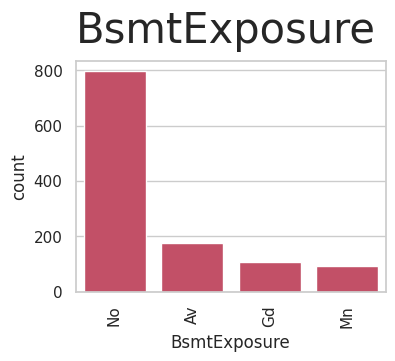

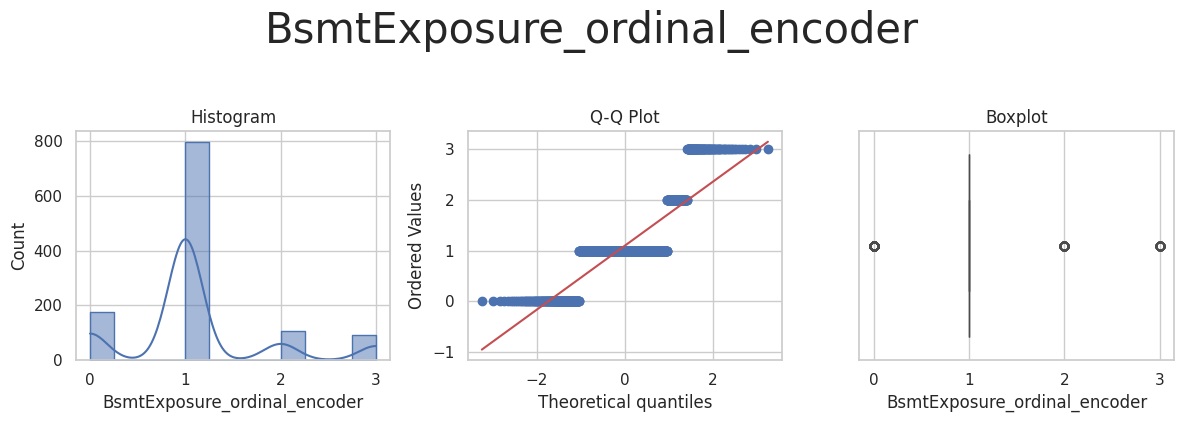



* Analysed Variable: BsmtFinType1
* Transformation Applied: ['BsmtFinType1_ordinal_encoder'] 



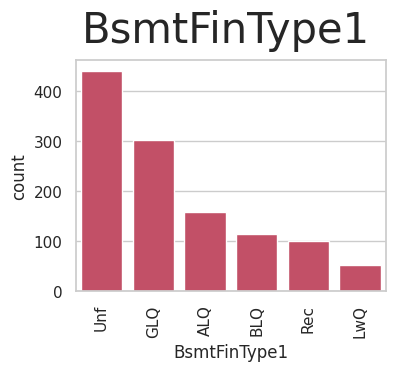

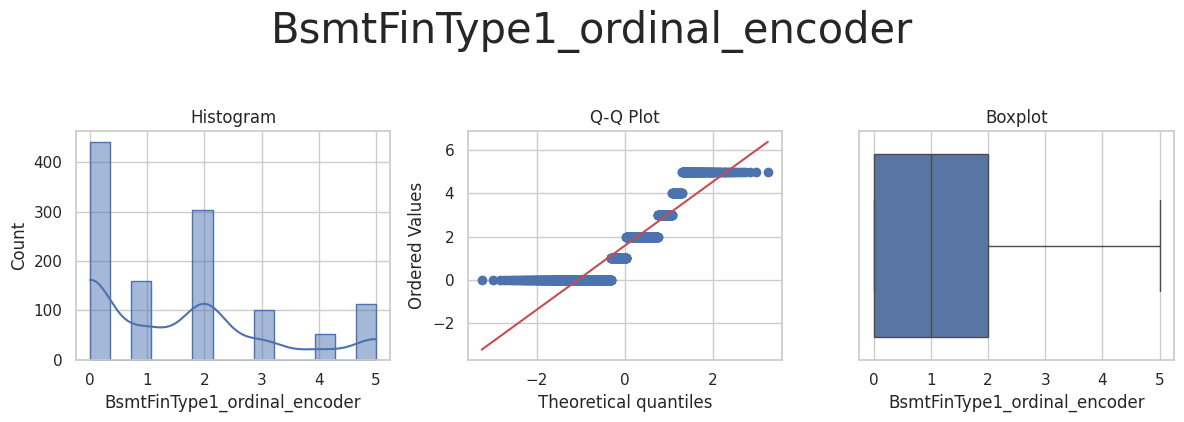



* Analysed Variable: GarageFinish
* Transformation Applied: ['GarageFinish_ordinal_encoder'] 



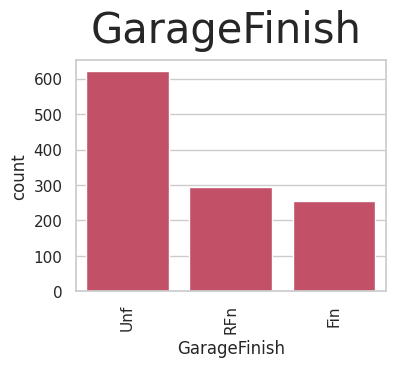

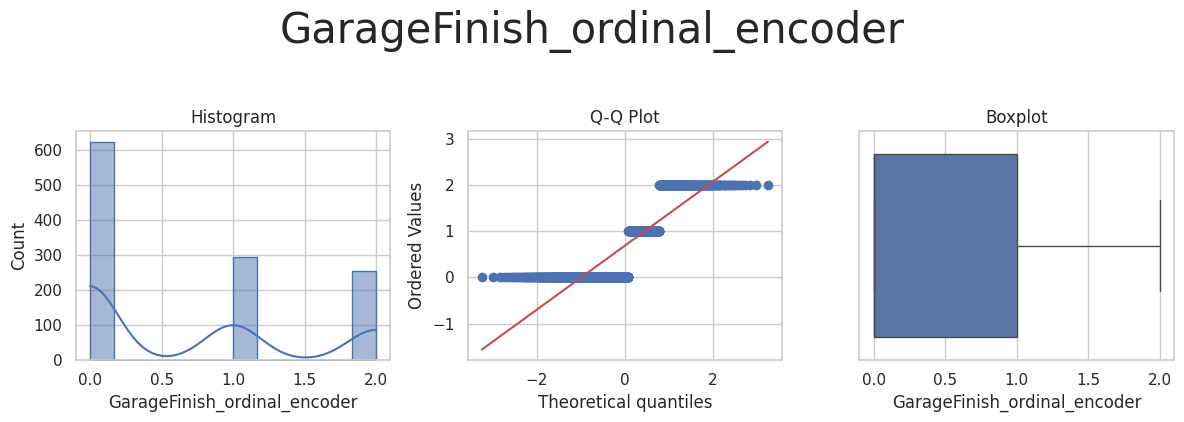



* Analysed Variable: KitchenQual
* Transformation Applied: ['KitchenQual_ordinal_encoder'] 



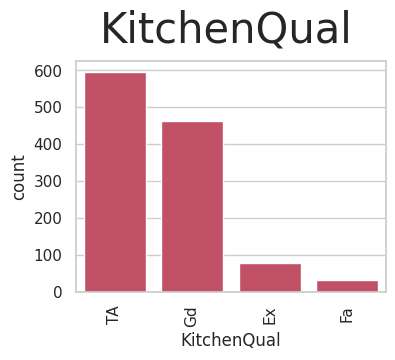

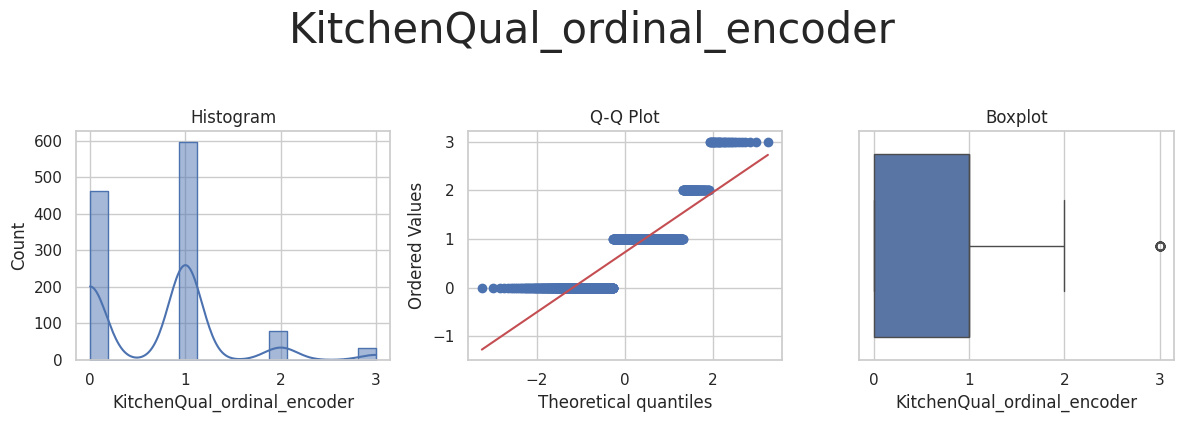

In [ ]:
categorical_engineering = FeatureEngineeringAnalysis(df=categorical_engineering, analysis_type='ordinal_encoder')

### Findings:

* The encoder has effectively converted the categories of each variable to numbers.
ordinal_encoder used.
* A few outliers were found, however this is not important.
* The data seems slightly skewed, the Q-Q plots do not have a clear read.


Step 4: Finally we apply these transformations to our Train and Test Datasets:

In [ ]:
encoder = OrdinalEncoder(encoding_method='arbitrary', variables=categorical_vars)
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

print("* Categorical Encoding - Ordinal Transformation Done!")

* Categorical Encoding - Ordinal Transformation Done!


## Numerical Transformation

Step 1: First we select the variables we want to replace:

In [12]:
numerical_vars = ['1stFlrSF', '2ndFlrSF', 'GrLivArea','BsmtFinSF1', 'BsmtUnfSF', 
                    'TotalBsmtSF', 'GarageArea', 'LotArea', 'LotFrontage', 'OpenPorchSF', 
                    'MasVnrArea', 'SalePrice']
numerical_vars

['1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageArea',
 'LotArea',
 'LotFrontage',
 'OpenPorchSF',
 'MasVnrArea',
 'SalePrice']

Step 2: We create a separate Dataframe to view the selected variables:

In [13]:
numerical_engineering = TrainSet[numerical_vars].copy()
numerical_engineering.head(5)

1stFlrSF  2ndFlrSF  GrLivArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0      1828       0.0       1828          48       1774         1822   
1       894       0.0        894           0        894          894   
2       964       0.0        964         713        163          876   
3      1689       0.0       1689        1218        350         1568   
4      1541       0.0       1541           0       1541         1541   

   GarageArea  LotArea  LotFrontage  OpenPorchSF  MasVnrArea  SalePrice  
0         774    11694         90.0          108       452.0     314813  
1         308     6600         60.0            0         0.0     109500  
2         432    13360         80.0            0         0.0     163500  
3         857    13265         69.0           59       148.0     271000  
4         843    13704        118.0           81       150.0     205000

Step 3: Create the engineered variables by applying the transformations from the custom function; this assess the engineered variable distribution:

* Analysed Variable: 1stFlrSF
* Transformation Applied: ['1stFlrSF_log_e', '1stFlrSF_log_10', '1stFlrSF_reciprocal', '1stFlrSF_power', '1stFlrSF_box_cox', '1stFlrSF_yeo_johnson'] 



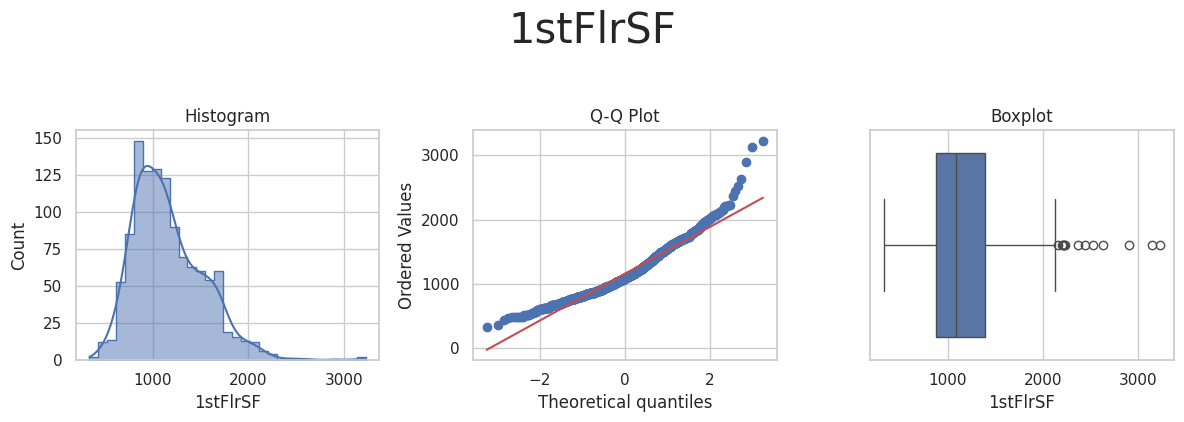

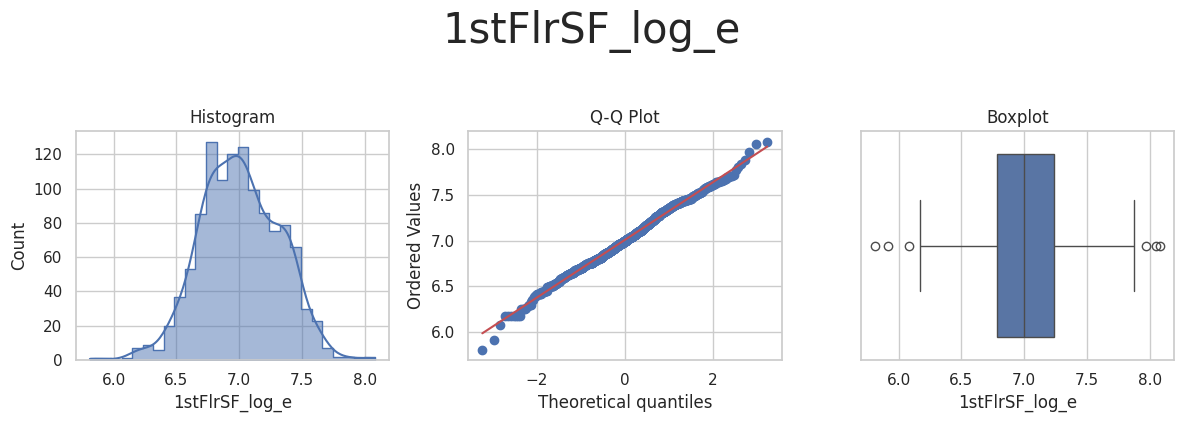

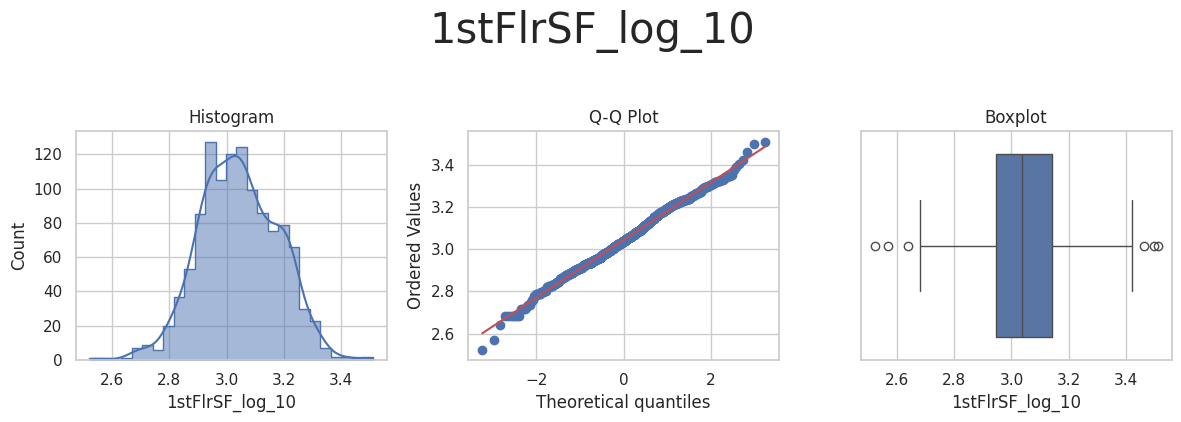

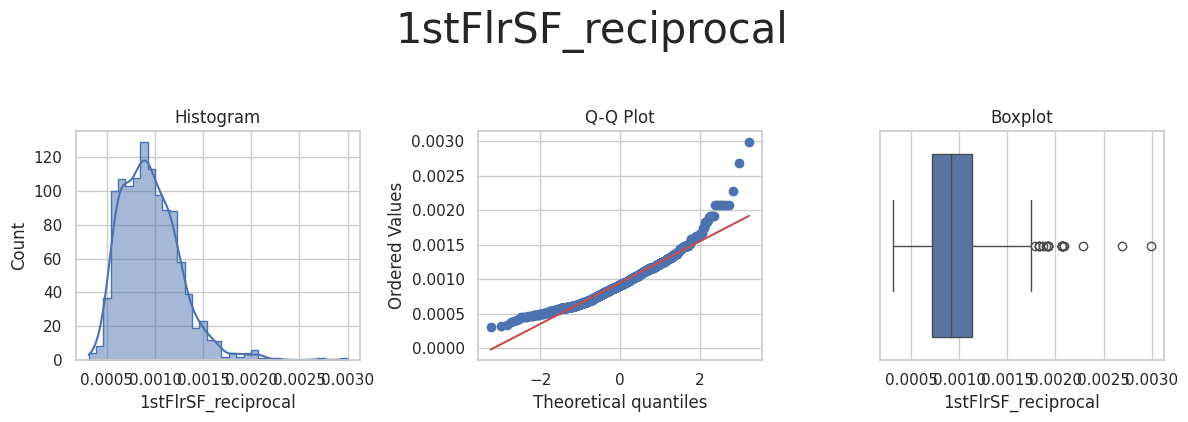

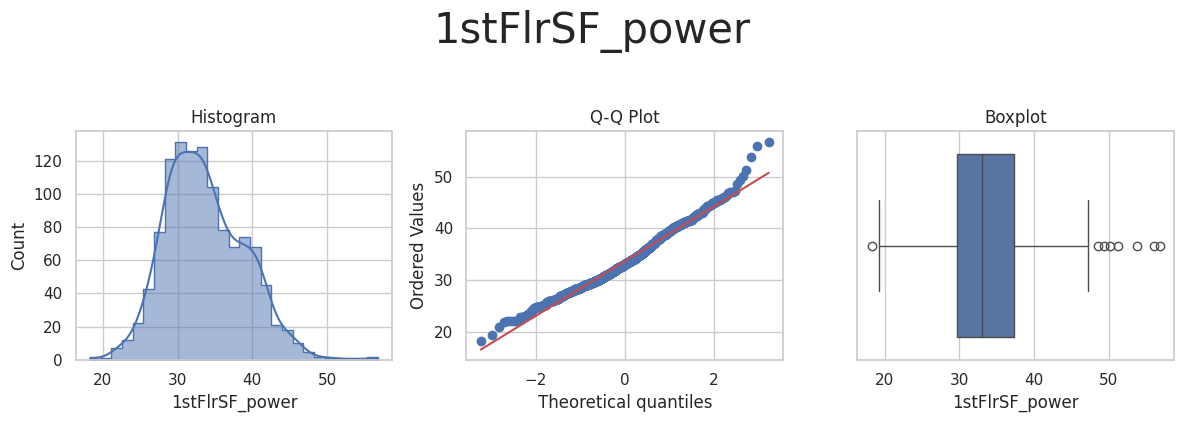

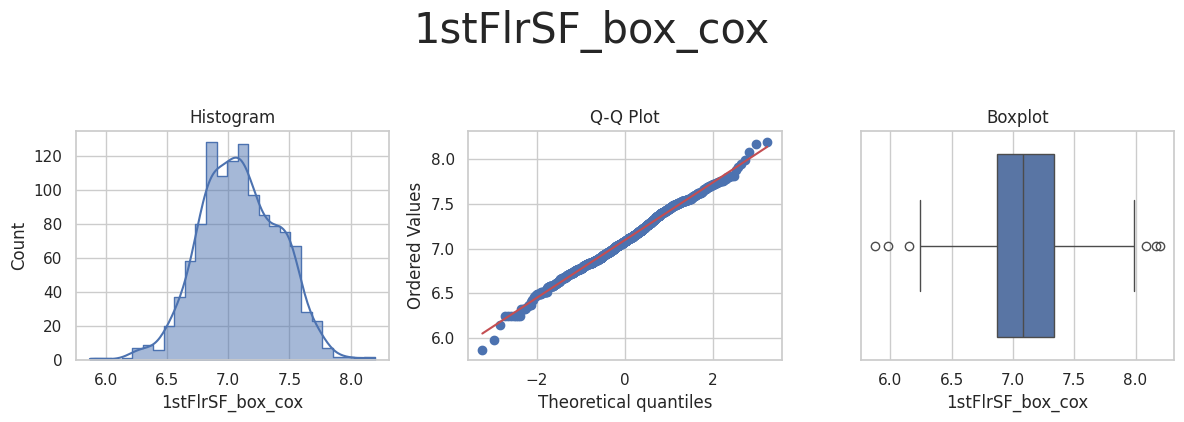

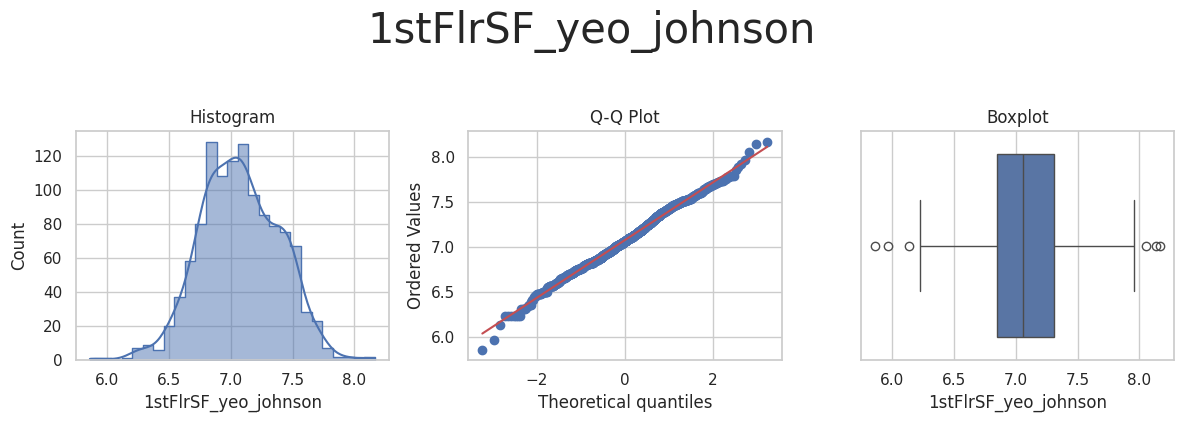



* Analysed Variable: 2ndFlrSF
* Transformation Applied: ['2ndFlrSF_power', '2ndFlrSF_yeo_johnson'] 



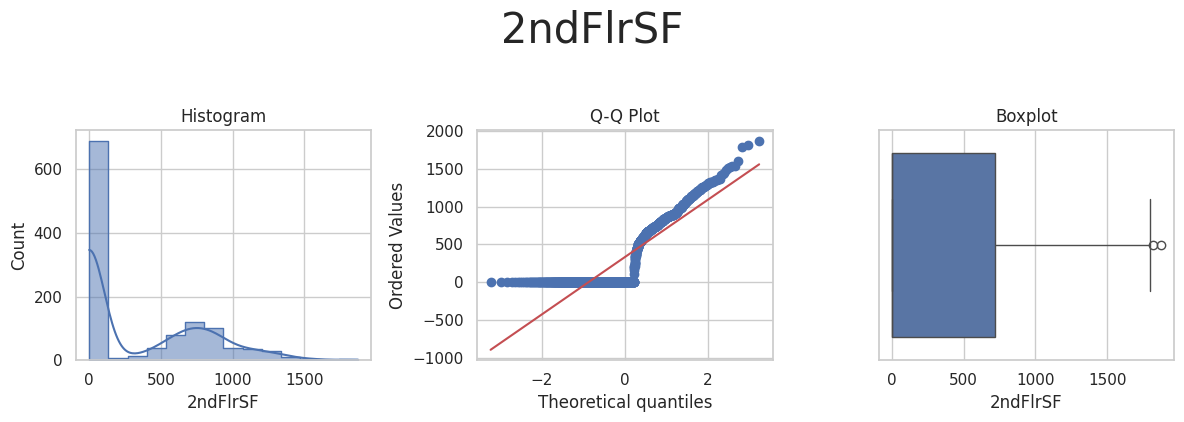

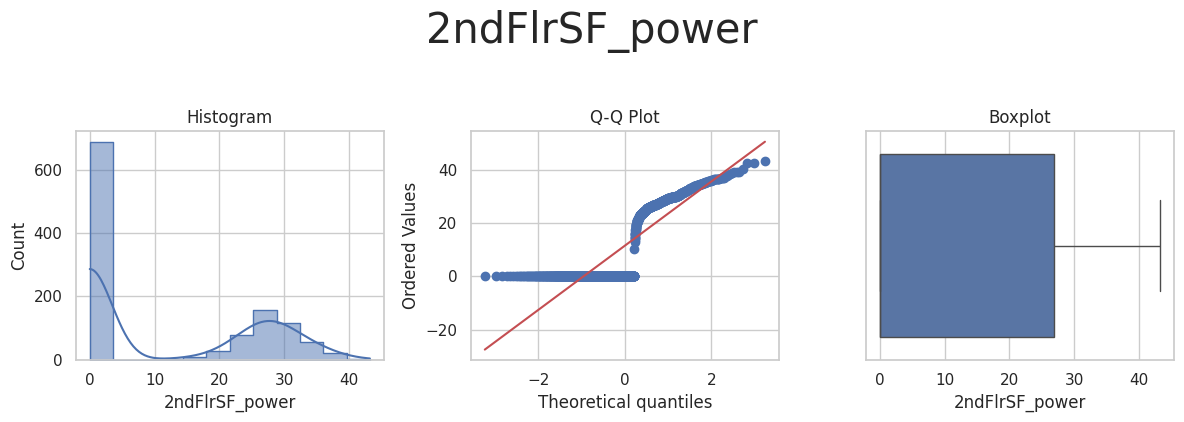

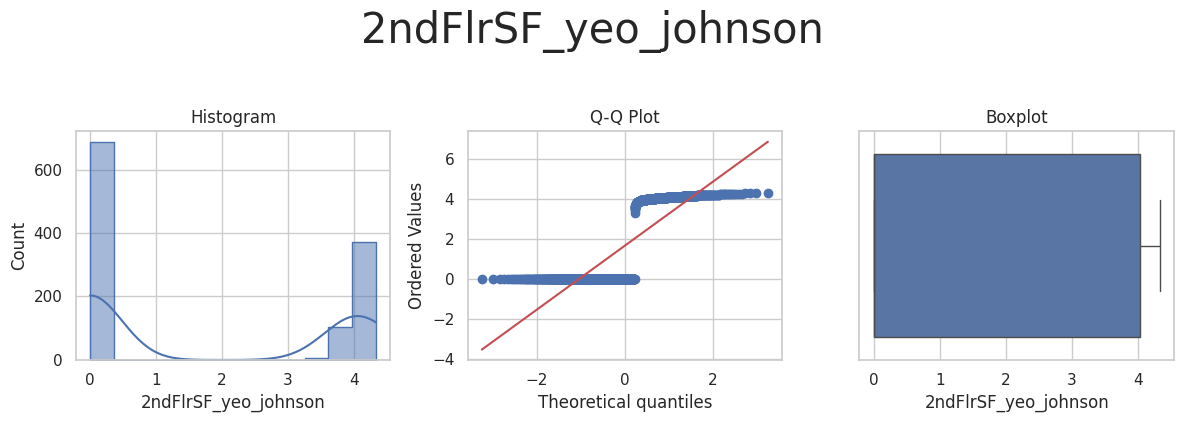



* Analysed Variable: GrLivArea
* Transformation Applied: ['GrLivArea_log_e', 'GrLivArea_log_10', 'GrLivArea_reciprocal', 'GrLivArea_power', 'GrLivArea_box_cox', 'GrLivArea_yeo_johnson'] 



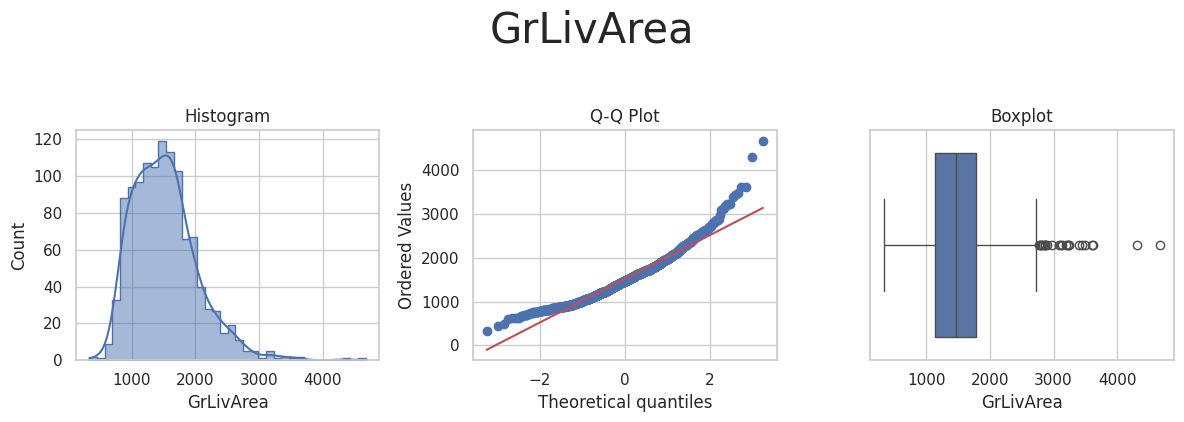

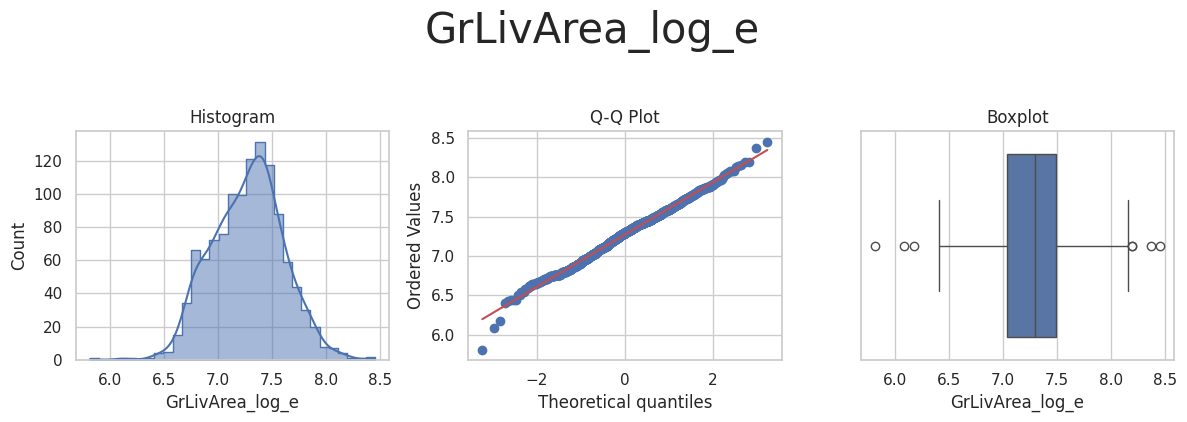

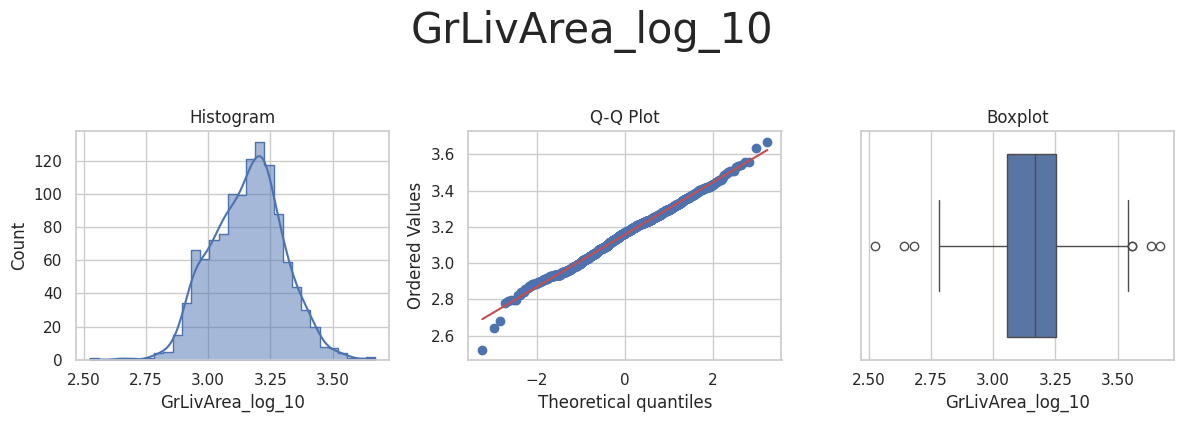

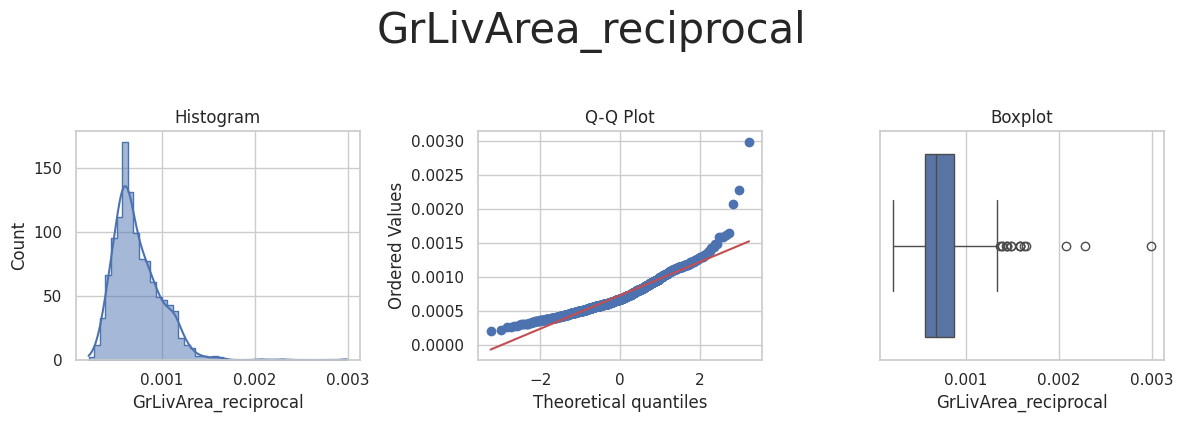

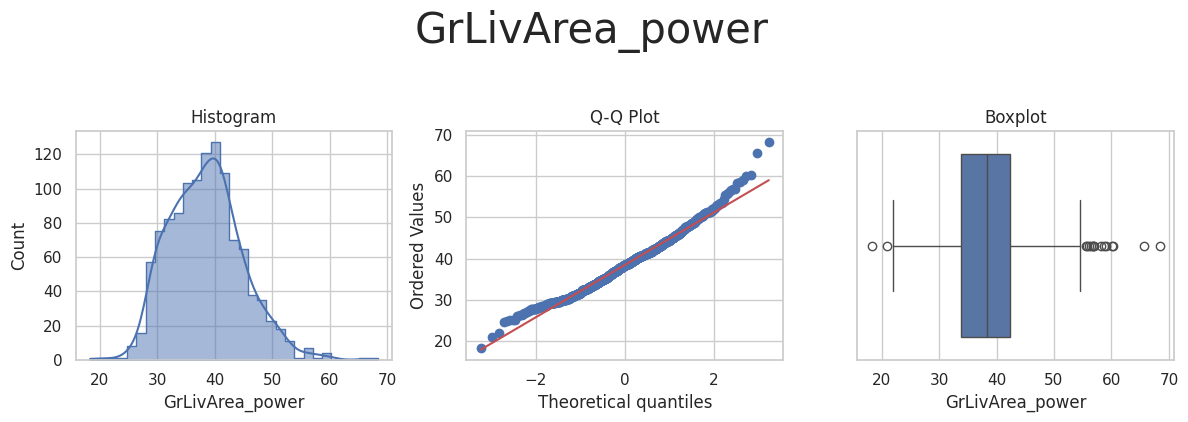

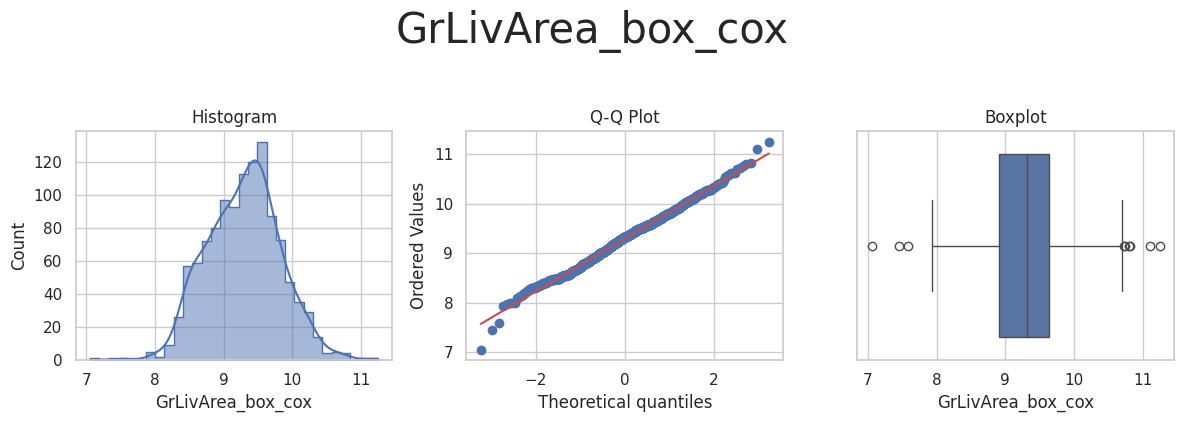

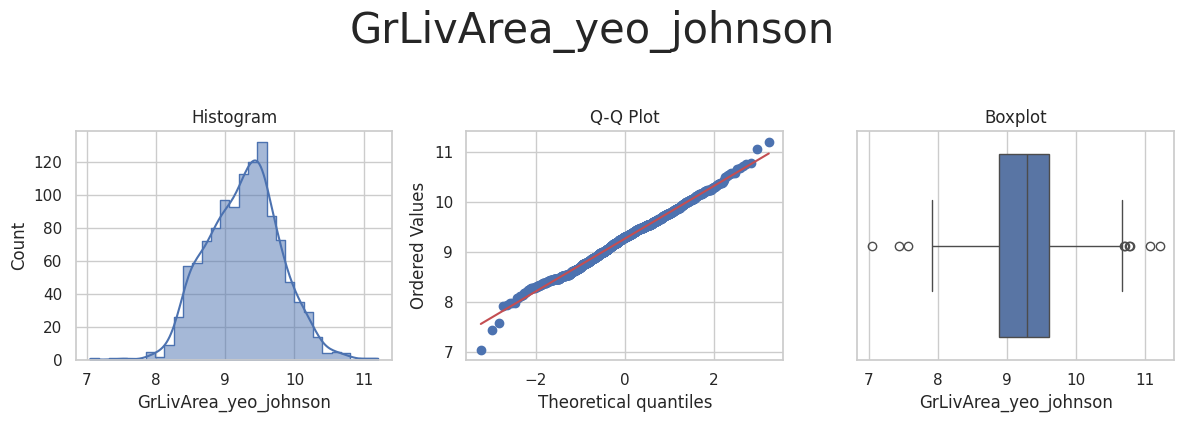



* Analysed Variable: BsmtFinSF1
* Transformation Applied: ['BsmtFinSF1_power', 'BsmtFinSF1_yeo_johnson'] 



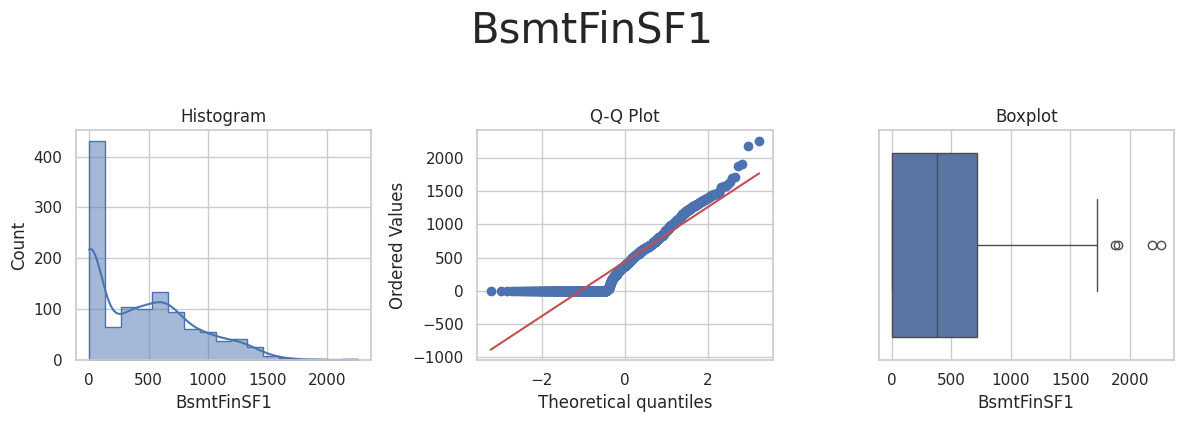

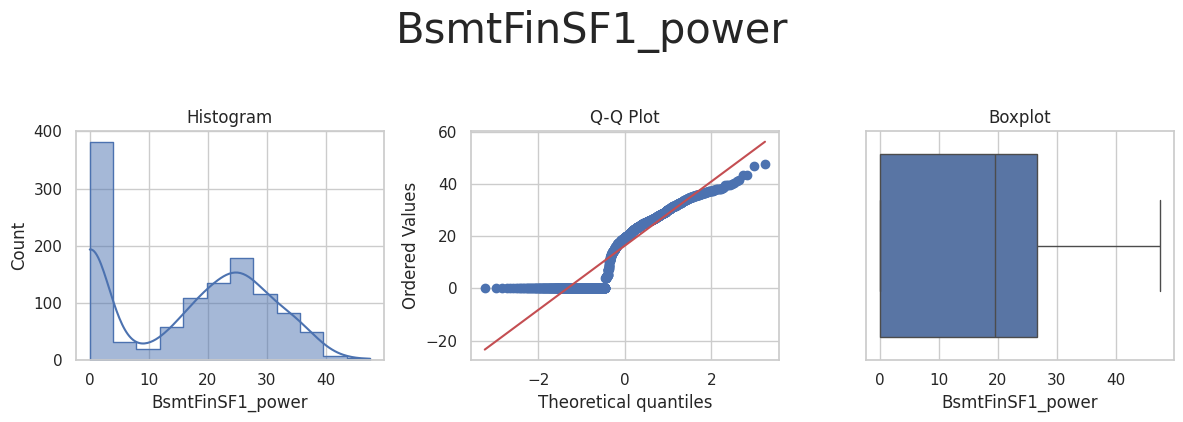

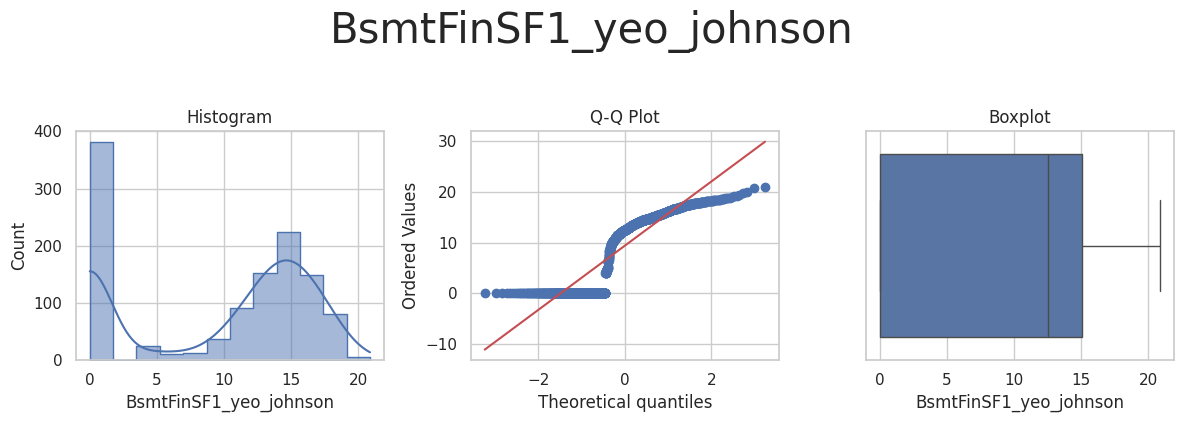



* Analysed Variable: BsmtUnfSF
* Transformation Applied: ['BsmtUnfSF_power', 'BsmtUnfSF_yeo_johnson'] 



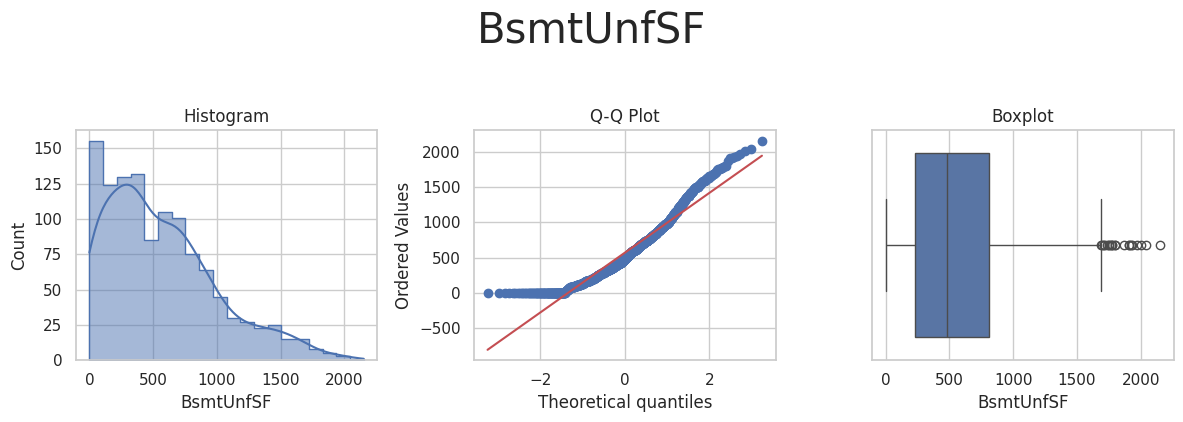

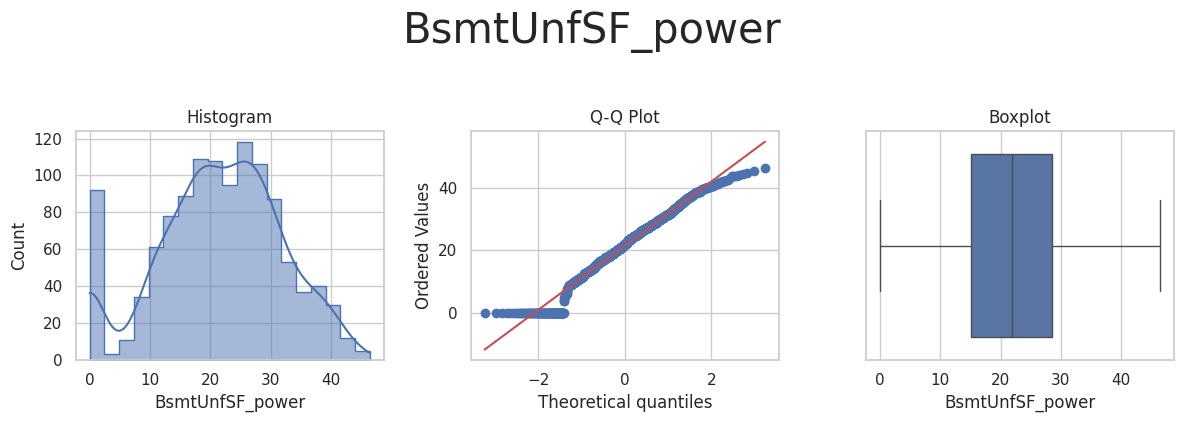

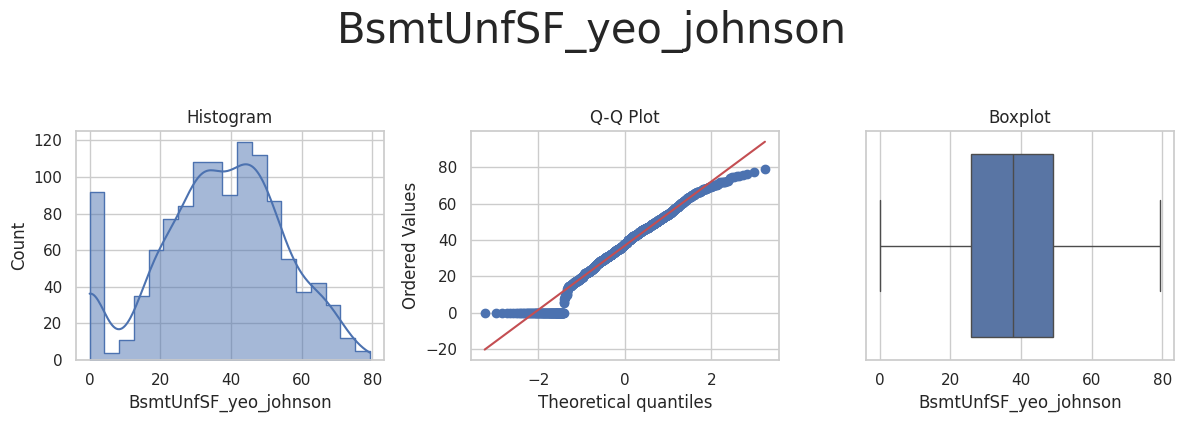



* Analysed Variable: TotalBsmtSF
* Transformation Applied: ['TotalBsmtSF_power', 'TotalBsmtSF_yeo_johnson'] 



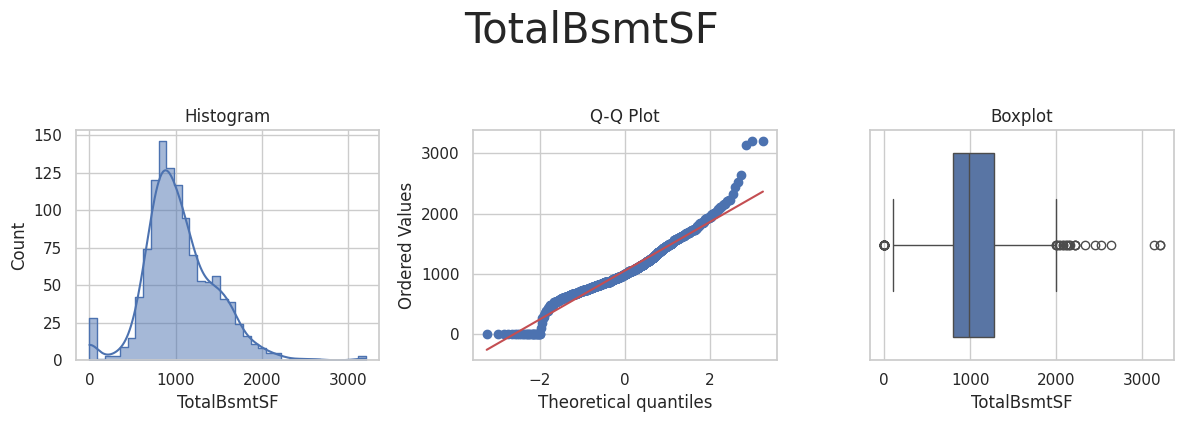

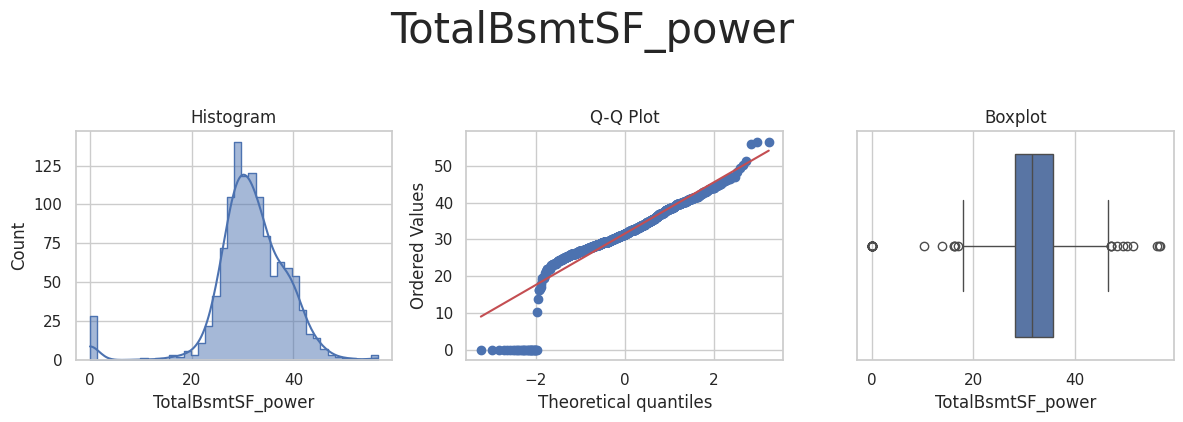

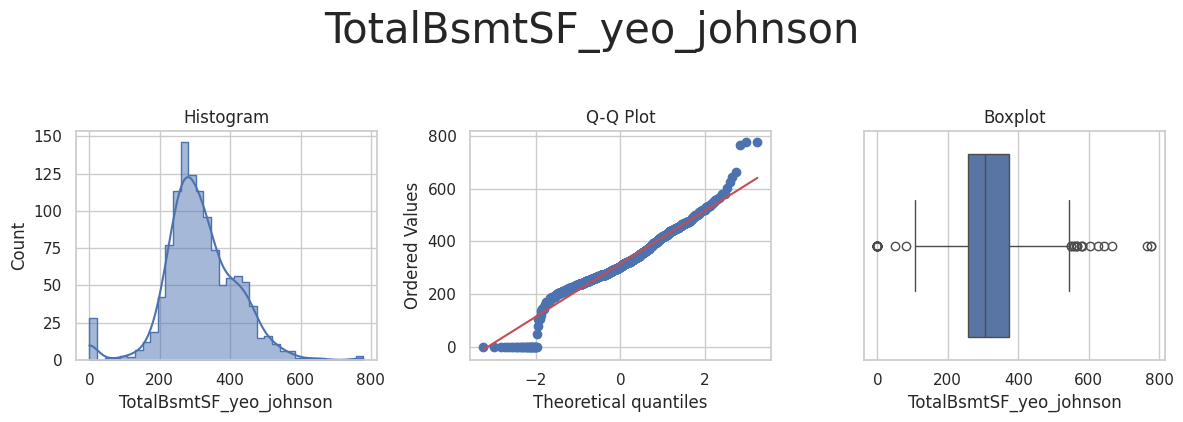



* Analysed Variable: GarageArea
* Transformation Applied: ['GarageArea_power', 'GarageArea_yeo_johnson'] 



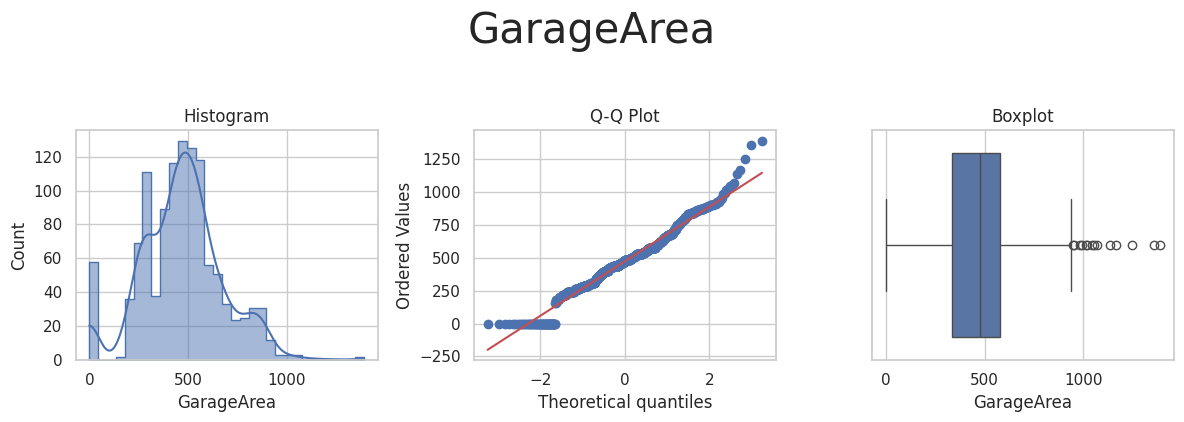

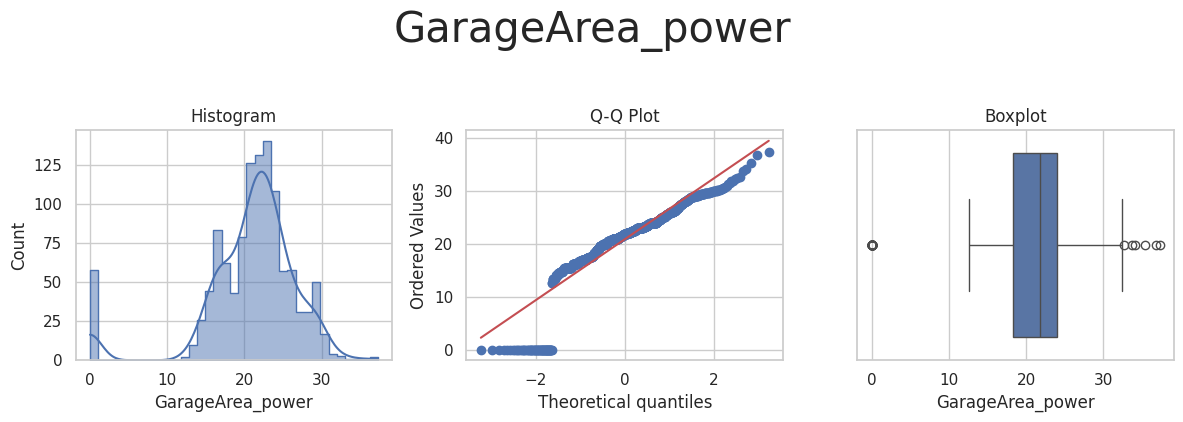

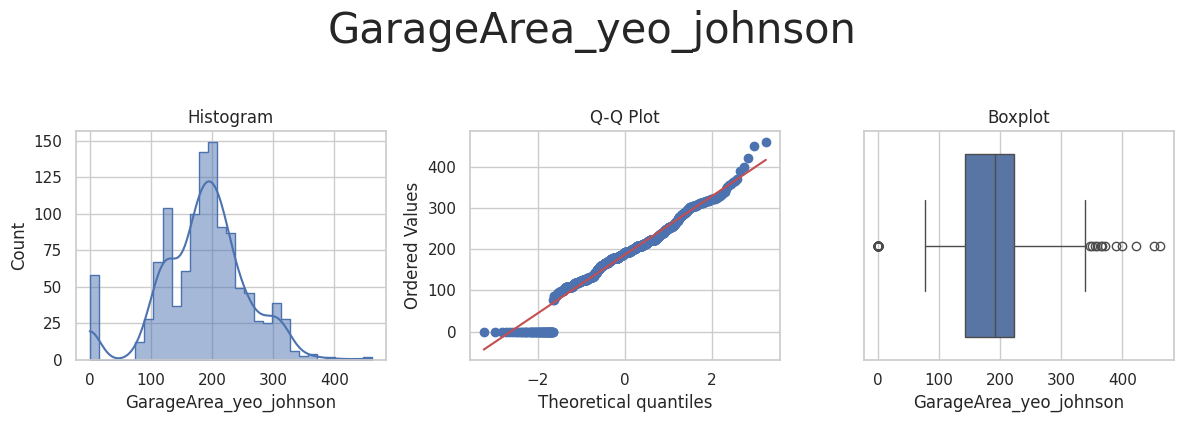



* Analysed Variable: LotArea
* Transformation Applied: ['LotArea_log_e', 'LotArea_log_10', 'LotArea_reciprocal', 'LotArea_power', 'LotArea_box_cox', 'LotArea_yeo_johnson'] 



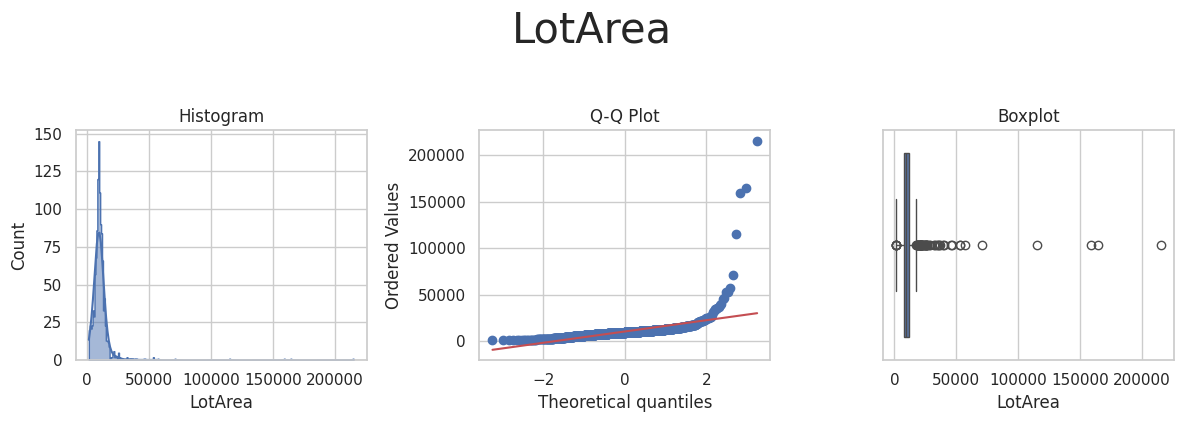

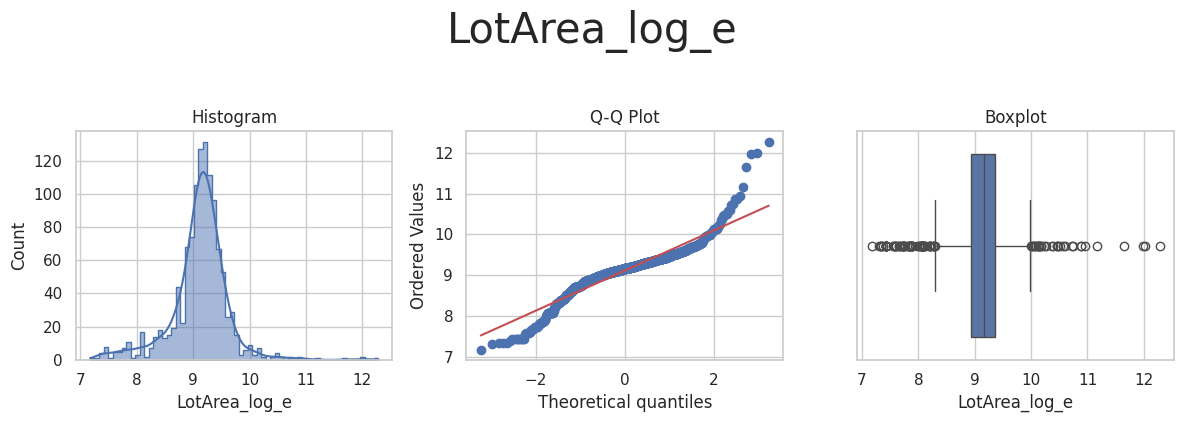

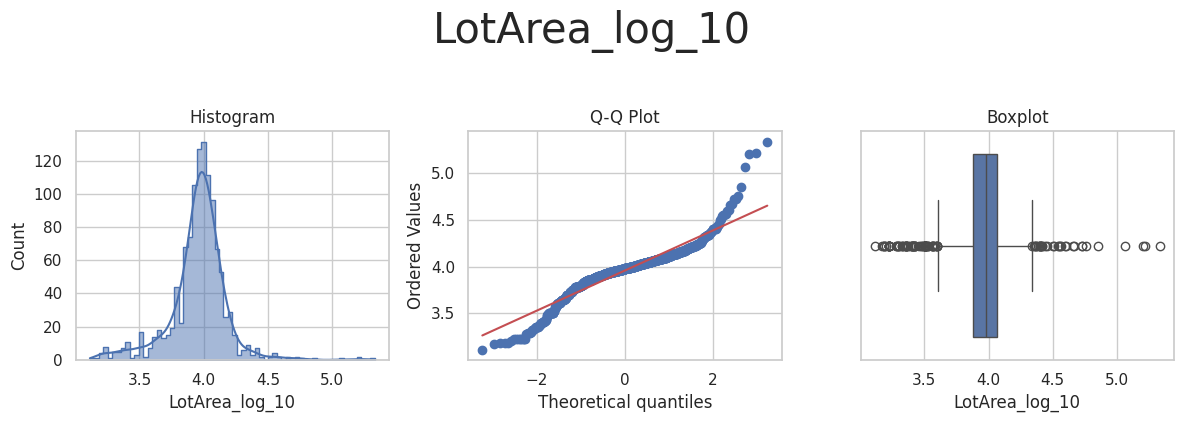

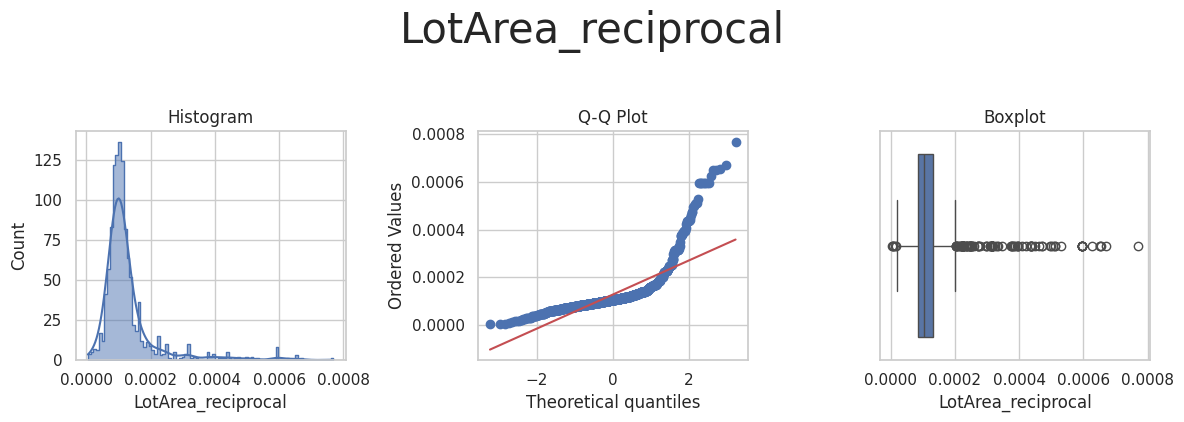

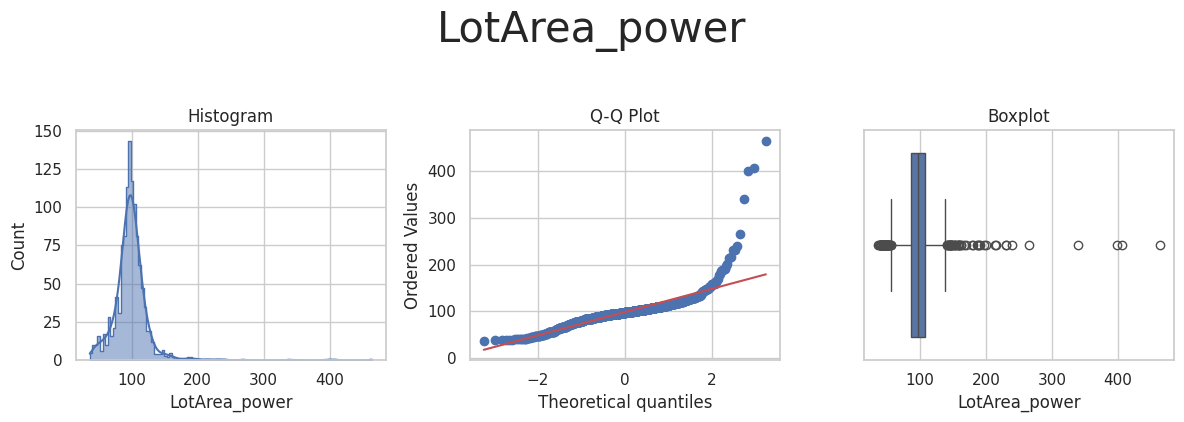

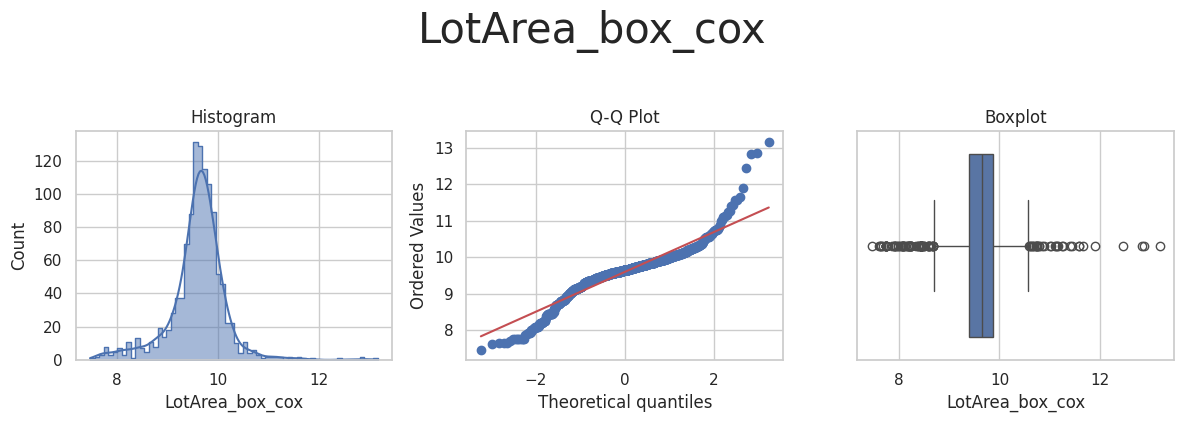

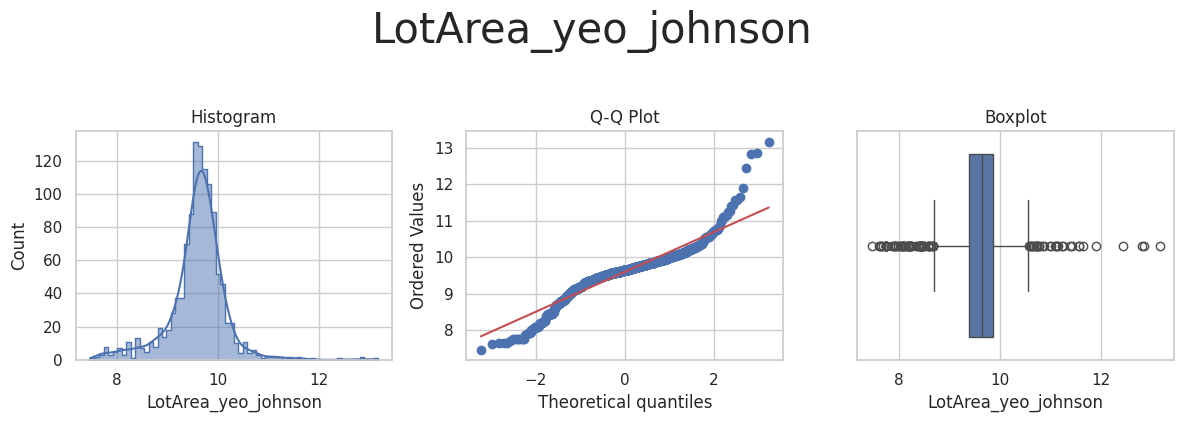



* Analysed Variable: LotFrontage
* Transformation Applied: ['LotFrontage_log_e', 'LotFrontage_log_10', 'LotFrontage_reciprocal', 'LotFrontage_power', 'LotFrontage_box_cox', 'LotFrontage_yeo_johnson'] 



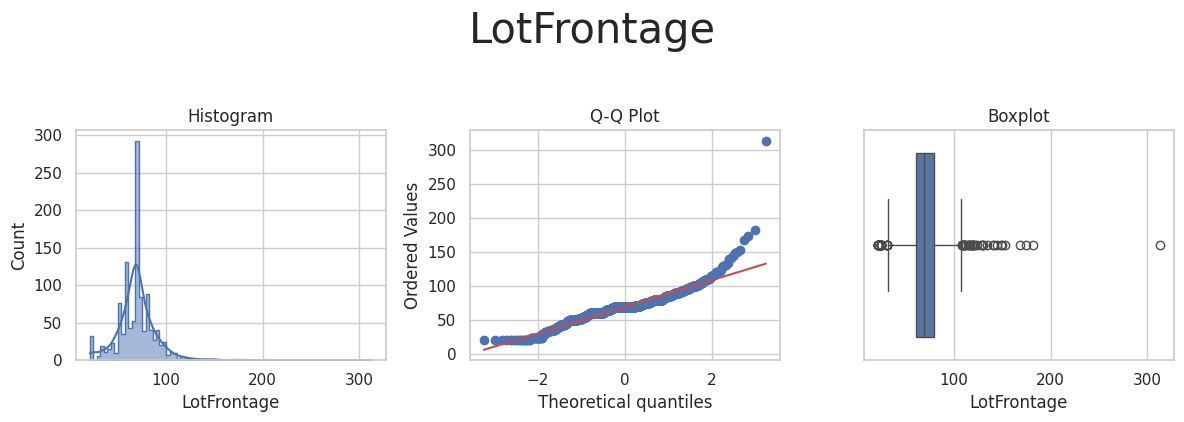

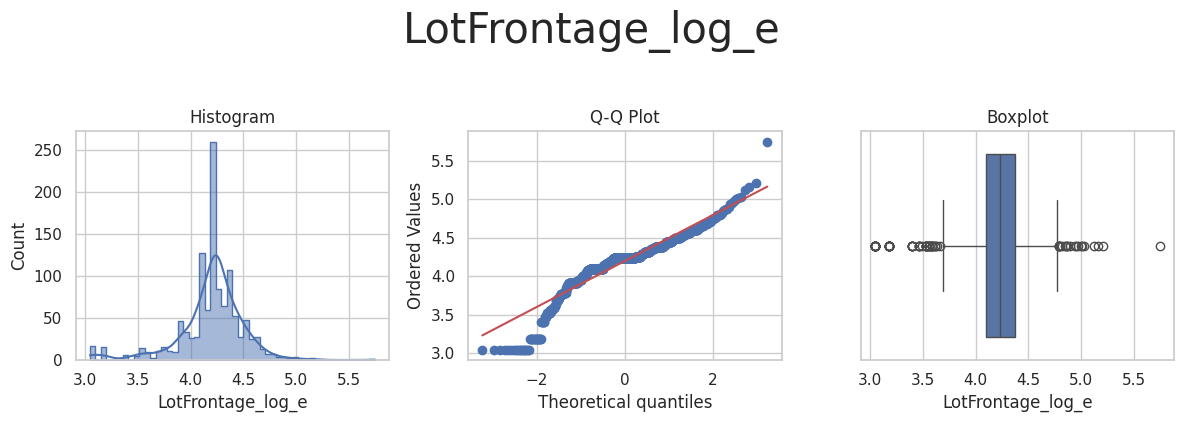

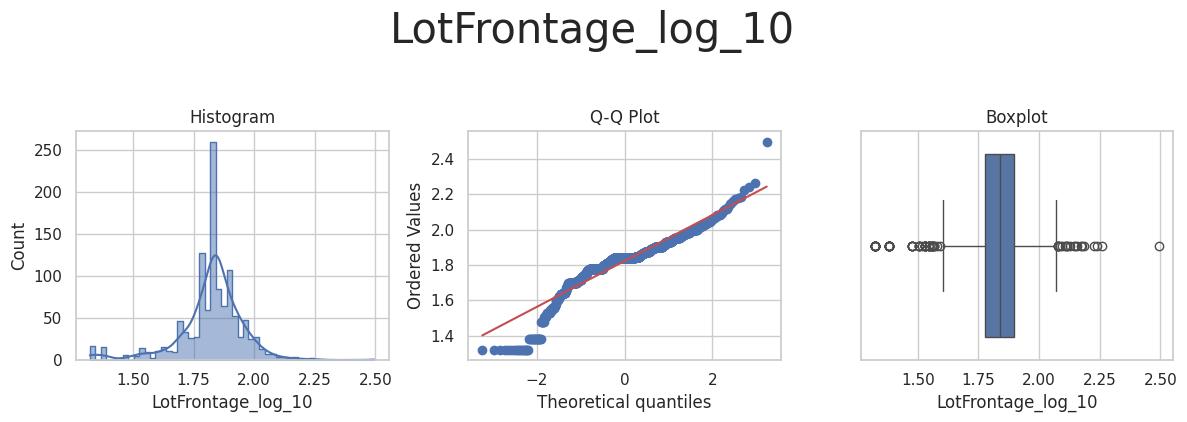

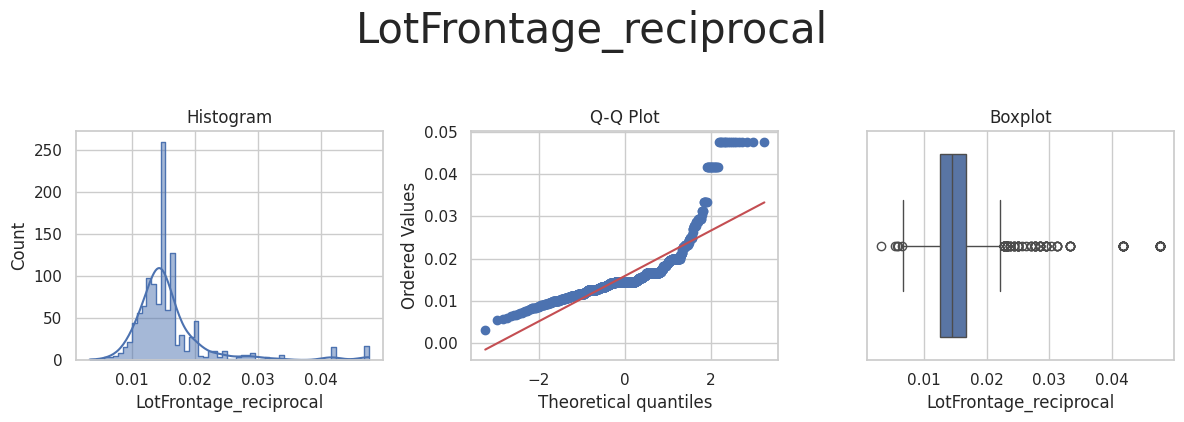

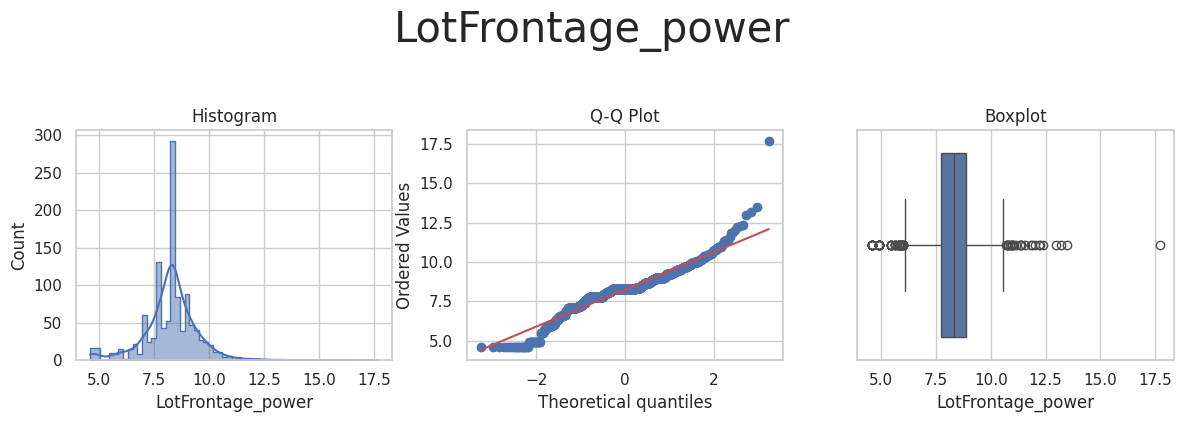

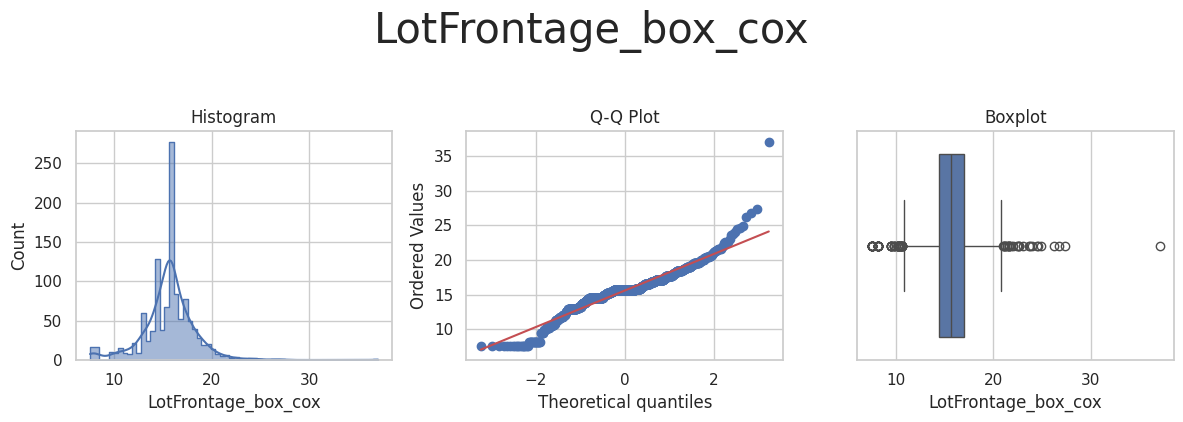

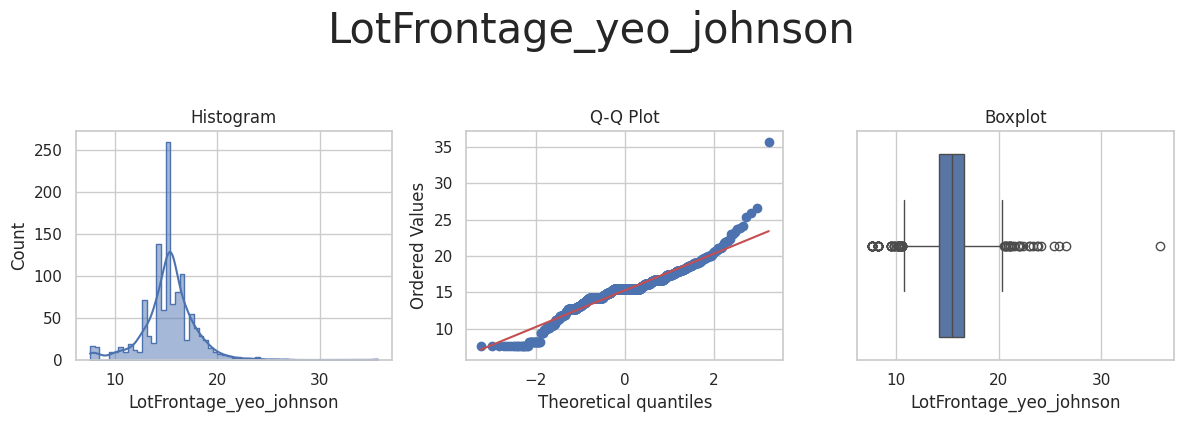



* Analysed Variable: OpenPorchSF
* Transformation Applied: ['OpenPorchSF_power', 'OpenPorchSF_yeo_johnson'] 



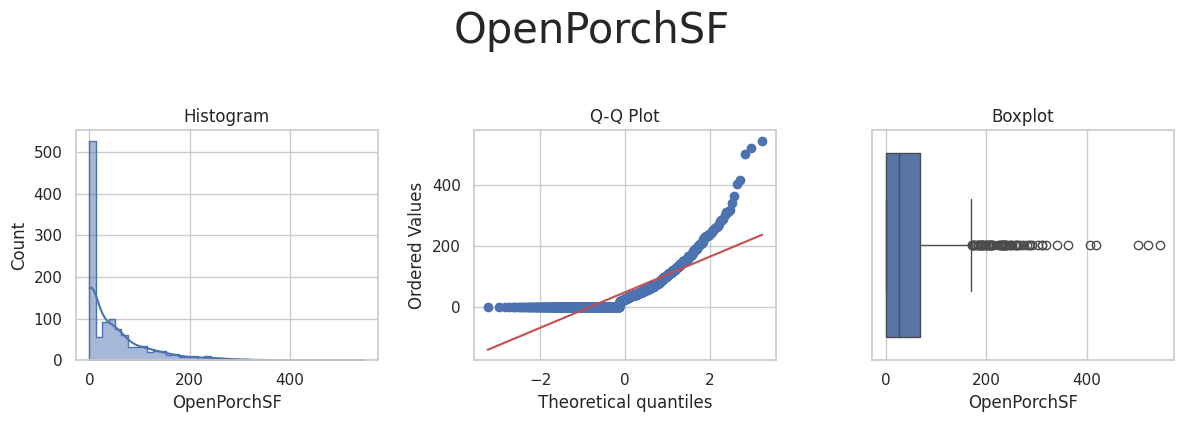

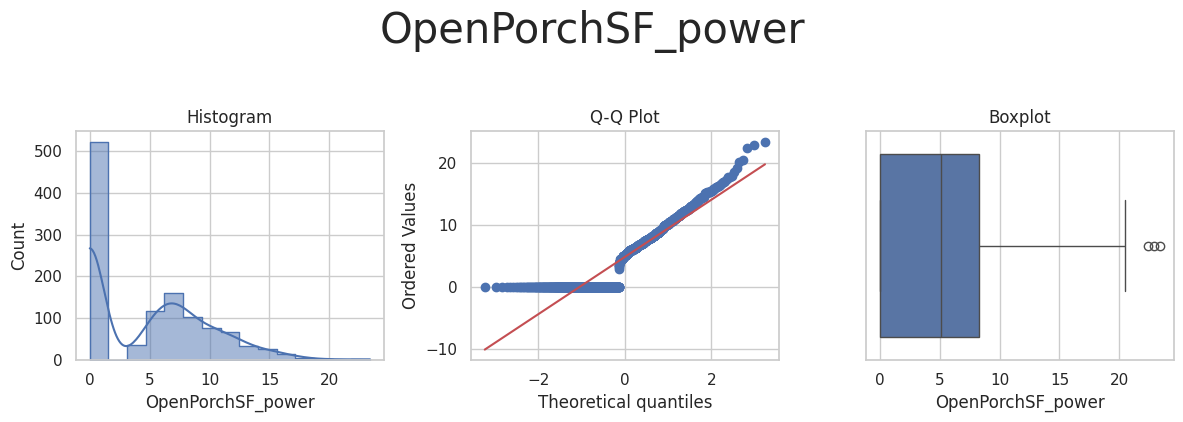

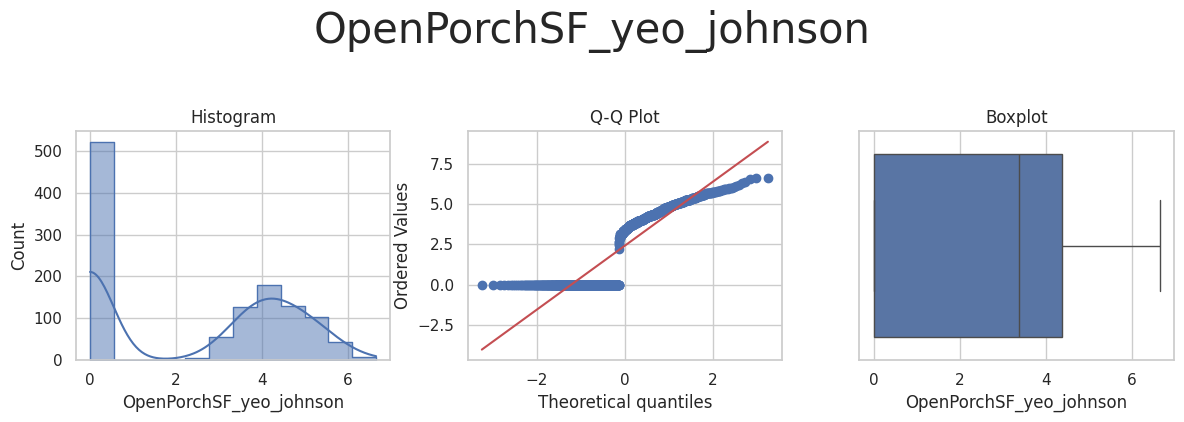



* Analysed Variable: MasVnrArea
* Transformation Applied: ['MasVnrArea_power', 'MasVnrArea_yeo_johnson'] 



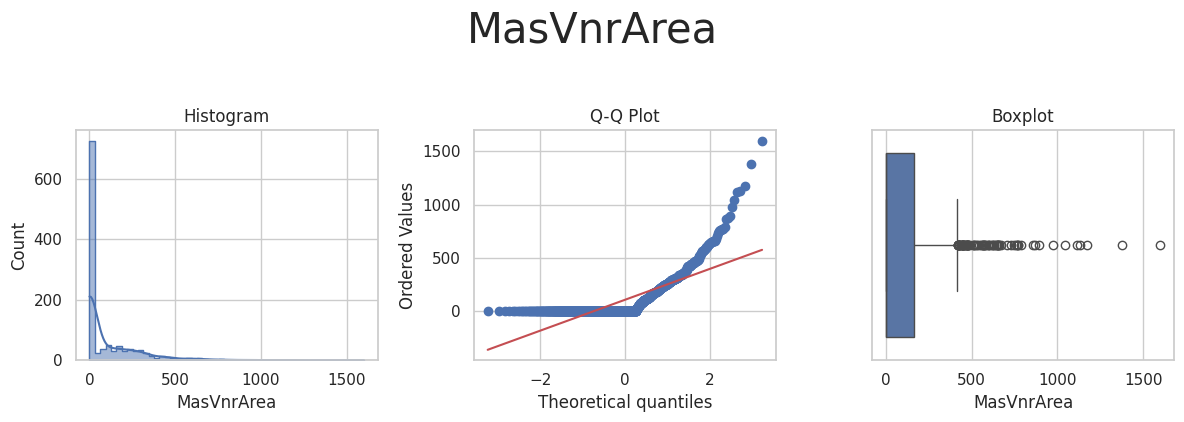

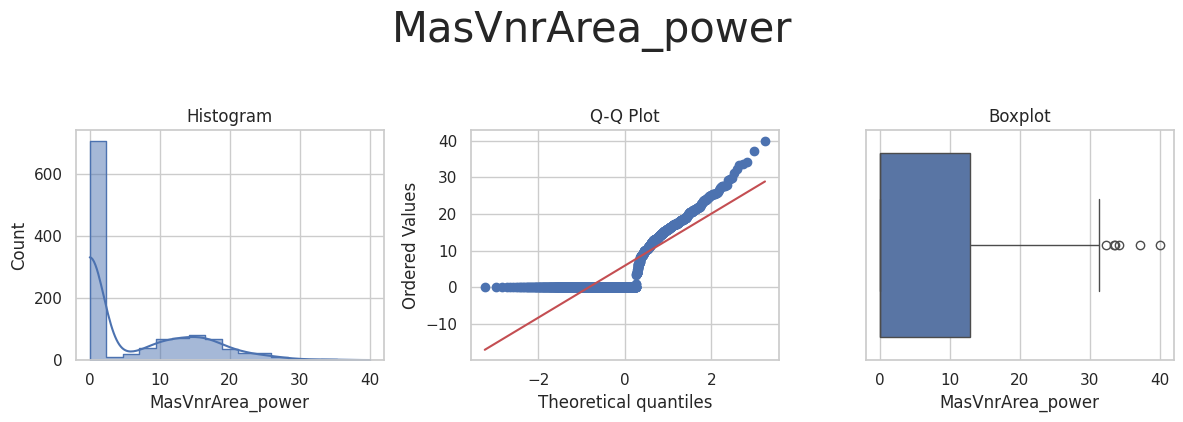

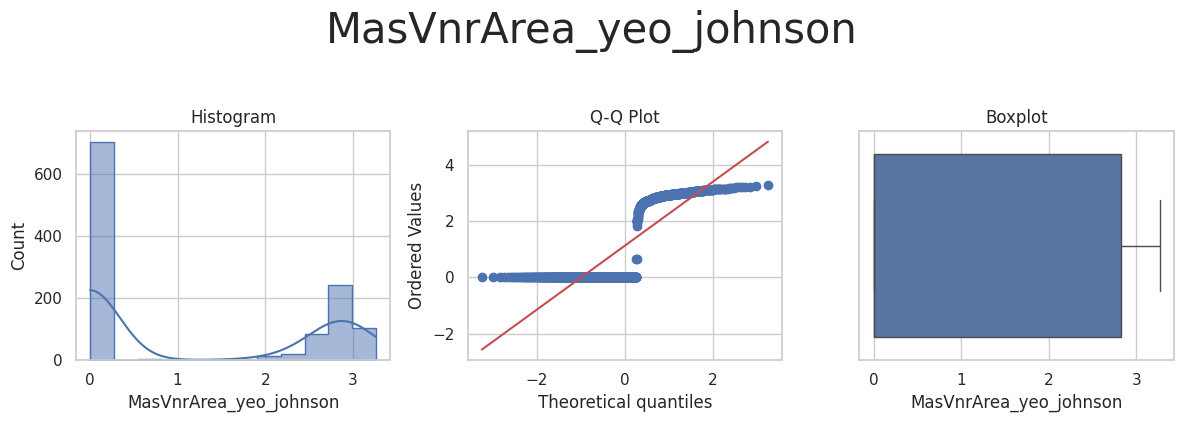



* Analysed Variable: SalePrice
* Transformation Applied: ['SalePrice_log_e', 'SalePrice_log_10', 'SalePrice_reciprocal', 'SalePrice_power', 'SalePrice_box_cox', 'SalePrice_yeo_johnson'] 



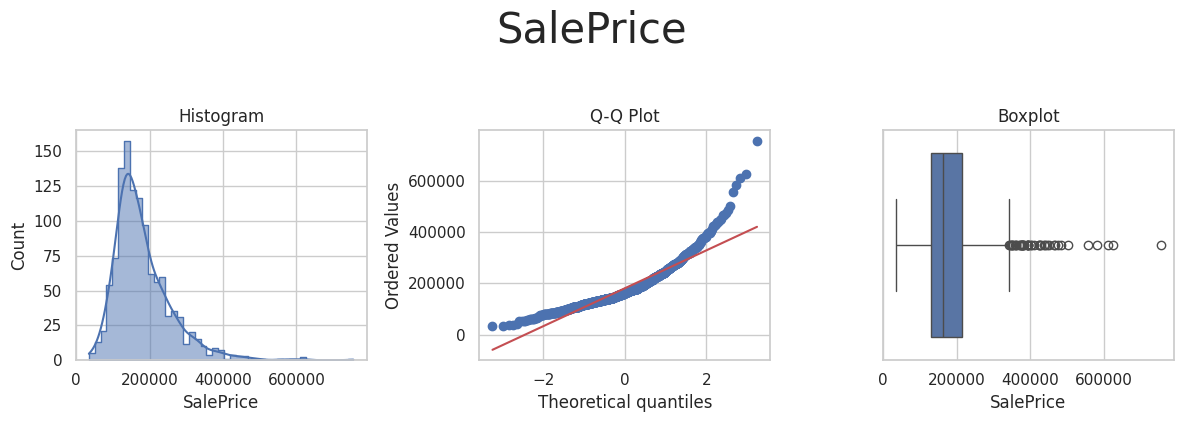

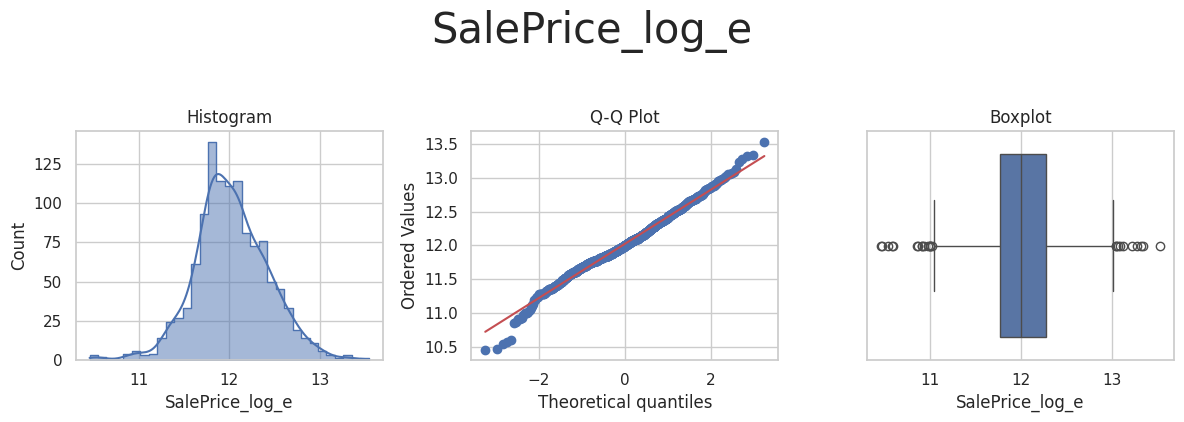

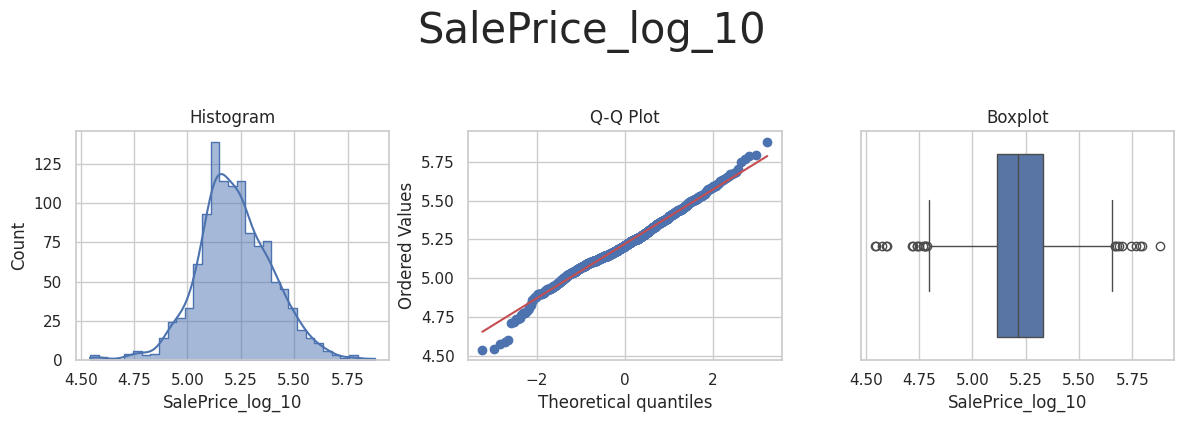

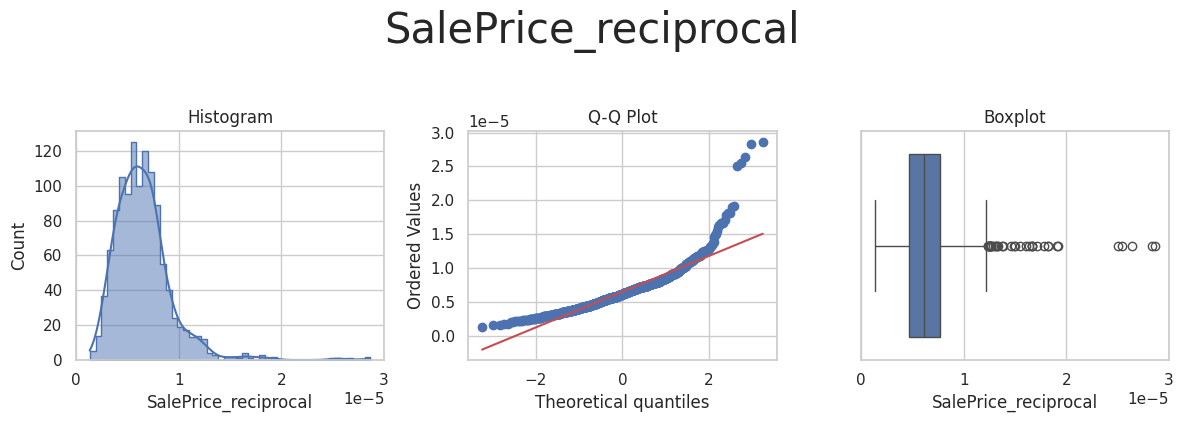

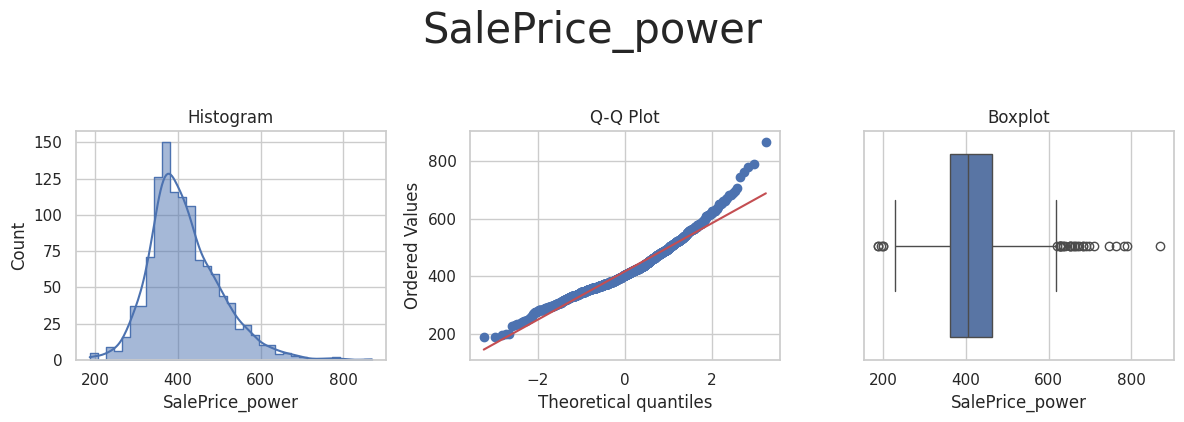

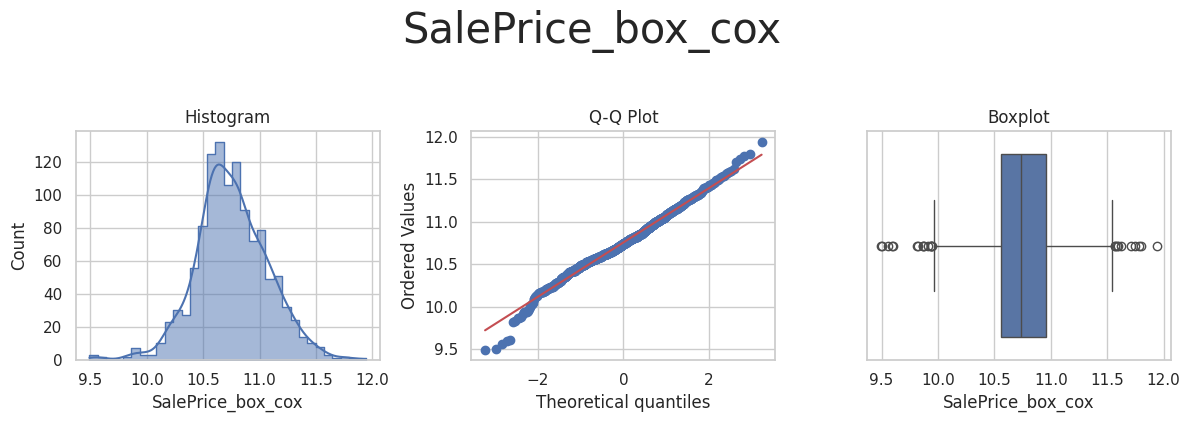

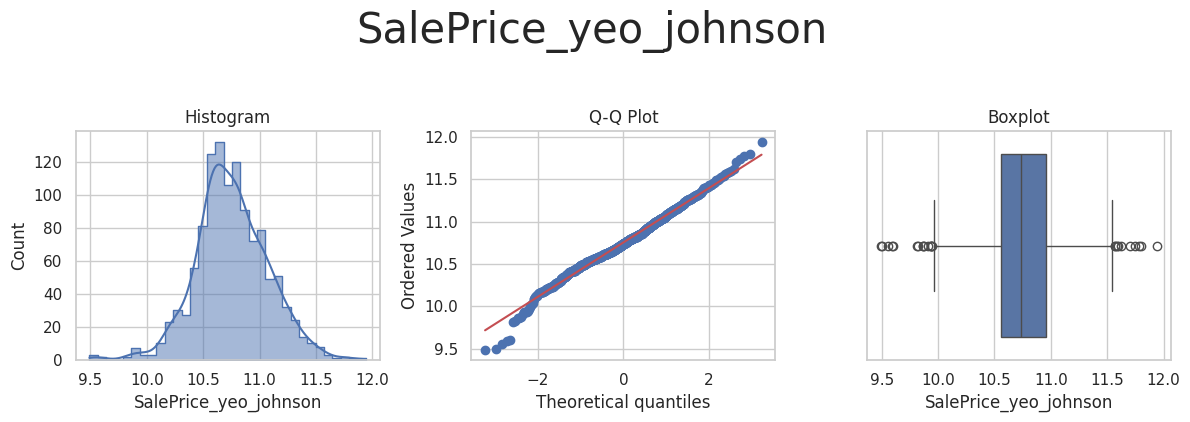

In [ ]:

numerical_engineering = FeatureEngineeringAnalysis(df=numerical_engineering, analysis_type='numerical')

### Findings:

1) Analysed Variables: 1stFlrSF, GrLivArea and Transformations Applied: ['log_e', 'log_10', 'reciprocal', 'power', 'box_cox', 'yeo_johnson']:

    * Histogram: Majority appears in a bell curve, indicating a normal distribution.
    * Q-Q Plot: Majority appears to have a normal/symetrical distribution.
    * Boxplot: Majority appears fairly normal, some outliers appearing on left and right side tails, therefore to use the Outlier Winsoriser.
    * Conclusions: ['log_e', 'log10', 'box_cox', 'yeo_johnson'] transformers to be considered for these variables due to the improvement of distribution shape overall, however we will be excluded Saleprice as this is our main variable.

2) Analysed Variable: 2ndFlrSF, BsmtFinSF1 and Transformations Applied: ['power', 'yeo_johnson']:

    * Histogram: Appears to have more of a right skewed/nonsymetrical distribution.
    * Q-Q Plot: Appears to have more of a under-dispersed distribution.
    * Boxplot: Matches the type of observations as above, some outliers on the right tail, therefore to use the Outlier Winsoriser.
    * Conclusions: No data to be transformed as no improvements were made.

3) Analysed Variable: BsmtUnfSF and Transformations Applied: ['power', 'yeo_johnson']:

    * Histogram: Appears to have more of a nonsymetrical distribution, despite having a bell-like curve.
    * Q-Q Plot: Appears to have more of a under-dispersed distribution.
    * Boxplot: Matches the type of observations as above, some outliers on the right tail, therefore to use the Outlier Winsoriser.
    * Conclusions: No data to be transformed as no improvements were made.

4) Analysed Variable: TotalBsmtSF, GarageArea and Transformations Applied: ['power', 'yeo_johnson']:

    * Histogram: Appears to have more of a nonsymetrical distribution, despite having a bell-like curve.
    * Q-Q Plot: Appears to have more of a under-dispersed distribution.
    * Boxplot: Matches the type of observations as above, some outliers on both left and right tails, therefore to use the Outlier Winsoriser.
    * Conclusions: No data to be transformed as no improvements were made.

5) Analysed Variables: LotArea and Transformations Applied: ['log_e', 'log_10', 'reciprocal', 'power', 'box_cox', 'yeo_johnson']:

    * Histogram: Majority appears in a bell curve, indicating a normal distribution.
    * Q-Q Plot: A mix of distribution, some better than others.
    * Boxplot: Majority appears fairly normal, some outliers appearing on left and right side tails, therefore to use the Outlier Winsoriser.
    * Conclusions: ['log_e', 'log10', 'box_cox', 'yeo_johnson'] transformers to be considered for these variables due to the improvement of distribution shape overall.

6) Analysed Variables: LotFrontage and Transformations Applied: ['log_e', 'log_10', 'reciprocal', 'power', 'box_cox', 'yeo_johnson']:

    * Histogram: Appears to have more of a nonsymetrical distribution, despite having a bell-like curve.
    * Q-Q Plot: Appears to have more of a under-dispersed distribution.
    * Boxplot: Matches the type of observations as above, some outliers on both left and right tails, therefore to use the Outlier Winsoriser.
    * Conclusions: No data to be transformed as no improvements were made.

7) Analysed Variable: OpenPorchSF and Transformations Applied: ['power', 'yeo_johnson']:

    * Histogram: Appears to have more of a nonsymetrical distribution.
    * Q-Q Plot: Appears to have more of a under-dispersed distribution.
    * Boxplot: Matches the type of observations as above, however one transformation shows improvement.
    * Conclusions: 'yeo_johnson' transformer to be considered for these variables due to the improvement of distribution shape overall.

8) Analysed Variable: MasVnrArea and Transformations Applied: ['power', 'yeo_johnson']:

    * Histogram: Appears to have more of a nonsymetrical distribution.
    * Q-Q Plot: Appears to have more of a under-dispersed distribution.
    * Boxplot: Matches the type of observations as above, some outliers on the right tail, therefore to use the Outlier Winsoriser.
    * Conclusions: 'power' transformer to be considered for these variables due to the improvement of distribution shape overall.

Step 4: Finally we apply the chosen transformations to our Train and Test Datasets:

In [14]:
log_transformer_vars = ['1stFlrSF', 'GrLivArea', 'LotArea']
power_transformer_vars = ['MasVnrArea']
yeo_transformer_vars = ['OpenPorchSF']

In [15]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("NumericLogTransform",vt.LogTransformer(variables=log_transformer_vars)),
    ("NumericPowerTransform",vt.PowerTransformer(variables=power_transformer_vars)),
    ("NumericYeoJohnsonTransform",vt.YeoJohnsonTransformer(variables=yeo_transformer_vars))
    ])
TrainSet = pipeline.fit_transform(TrainSet)
TestSet = pipeline.transform(TestSet)

print("* Numerical Transformations Done!")

* Numerical Transformations Done!


## Outlier Winsoriser

We found that there was some data that contained outliers, therefore in order to keep the observations with reducing the effect on prediction, we will use the Winsoriser. We will be using the same variables as the numerical transformer, except OpenPorchSF as the outliers were removed during the numerical transformation.

Step 1: First we select the variables we want to use:

In [16]:
winsoriser_vars = ['1stFlrSF', '2ndFlrSF', 'GrLivArea','BsmtFinSF1', 'BsmtUnfSF', 
                    'TotalBsmtSF', 'GarageArea', 'LotArea', 'LotFrontage', 
                    'MasVnrArea', 'SalePrice']
winsoriser_vars

['1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GarageArea',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'SalePrice']

Step 2: We create a separate Dataframe to view the selected variables:

In [17]:
winsoriser_vars = TrainSet[winsoriser_vars].copy()
winsoriser_vars.head(5)

1stFlrSF  2ndFlrSF  GrLivArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  \
0  7.510978       0.0   7.510978          48       1774         1822   
1  6.795706       0.0   6.795706           0        894          894   
2  6.871091       0.0   6.871091         713        163          876   
3  7.431892       0.0   7.431892        1218        350         1568   
4  7.340187       0.0   7.340187           0       1541         1541   

   GarageArea   LotArea  LotFrontage  MasVnrArea  SalePrice  
0         774  9.366831         90.0   21.260292     314813  
1         308  8.794825         60.0    0.000000     109500  
2         432  9.500020         80.0    0.000000     163500  
3         857  9.492884         69.0   12.165525     271000  
4         843  9.525443        118.0   12.247449     205000

Step 3: Create the engineered variables by applying the transformations:

* Analysed Variable: 1stFlrSF
* Transformation Applied: ['1stFlrSF_iqr'] 



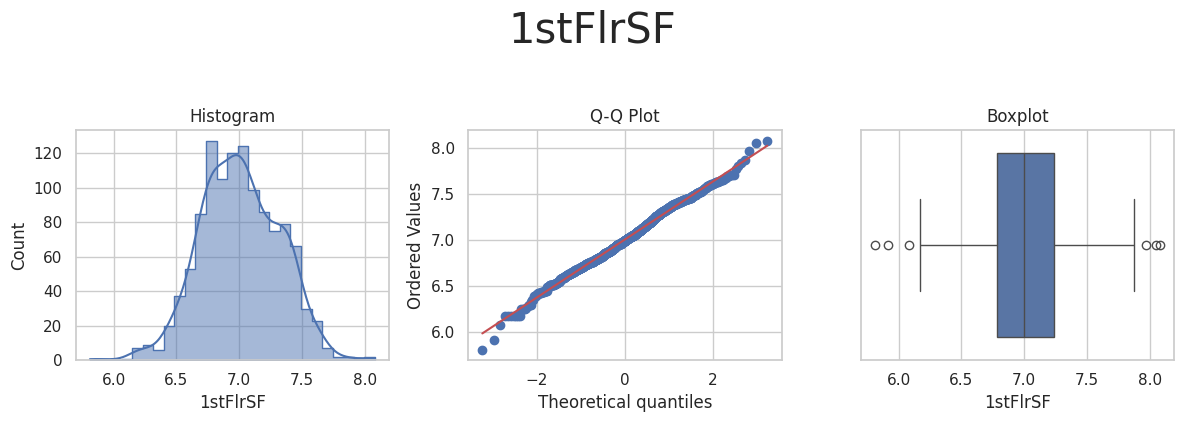

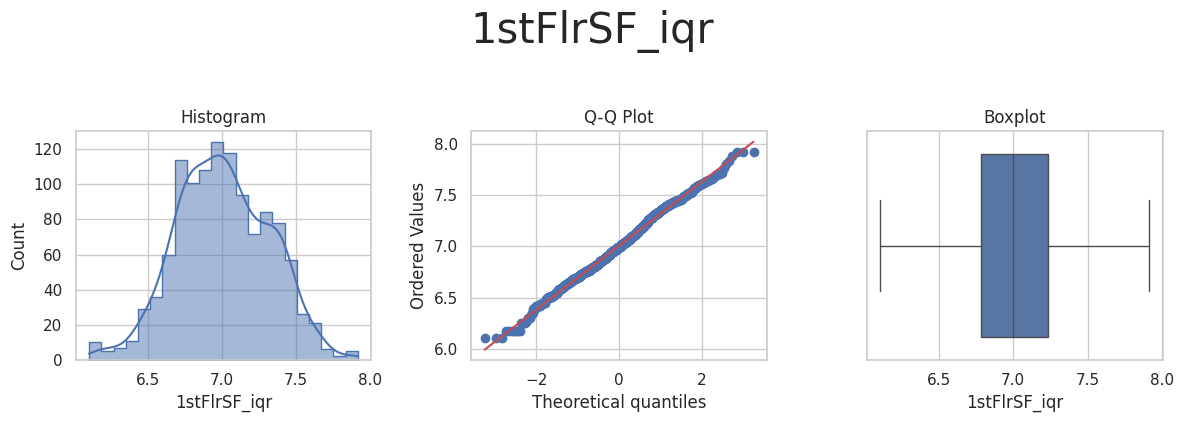



* Analysed Variable: 2ndFlrSF
* Transformation Applied: ['2ndFlrSF_iqr'] 



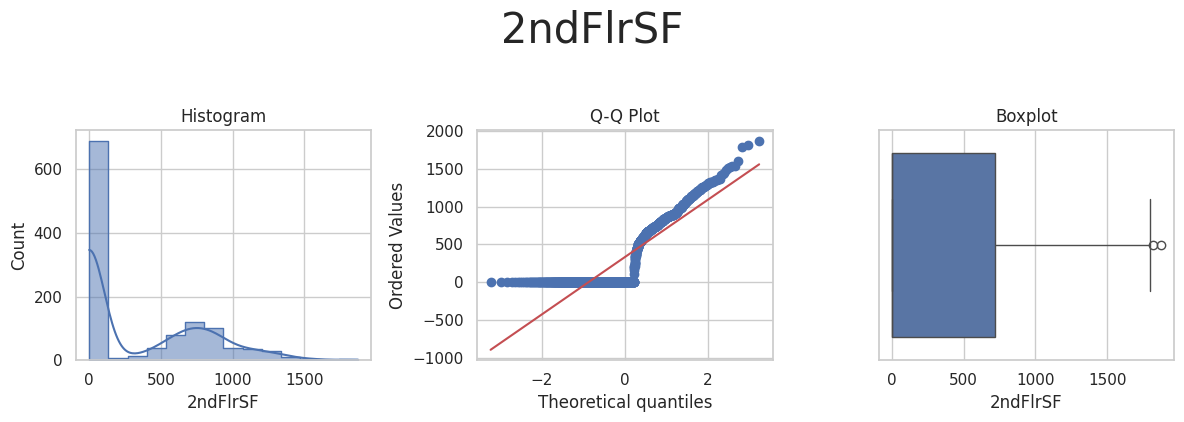

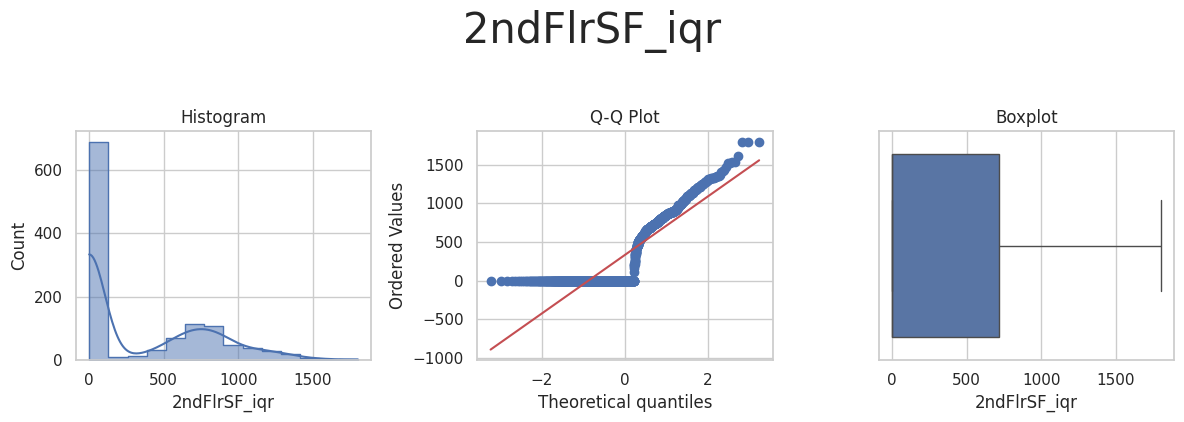



* Analysed Variable: GrLivArea
* Transformation Applied: ['GrLivArea_iqr'] 



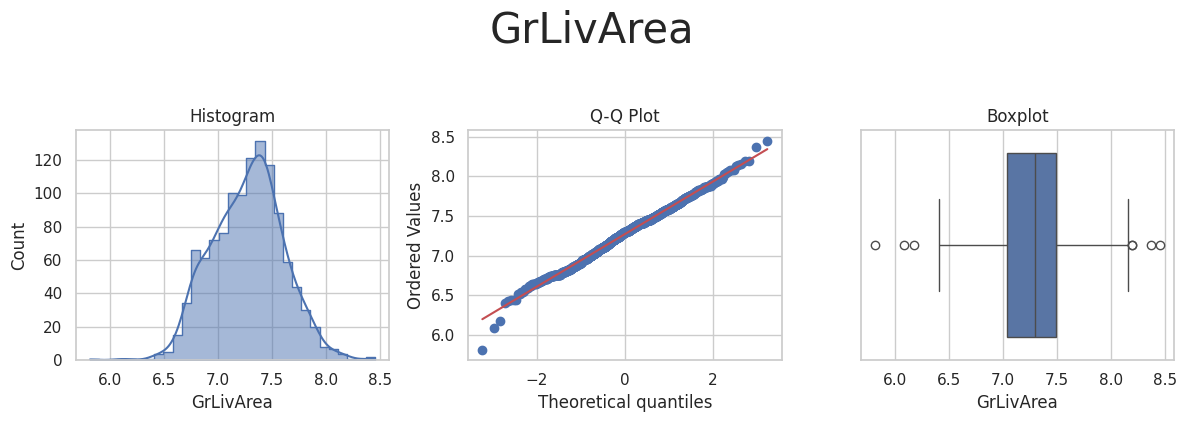

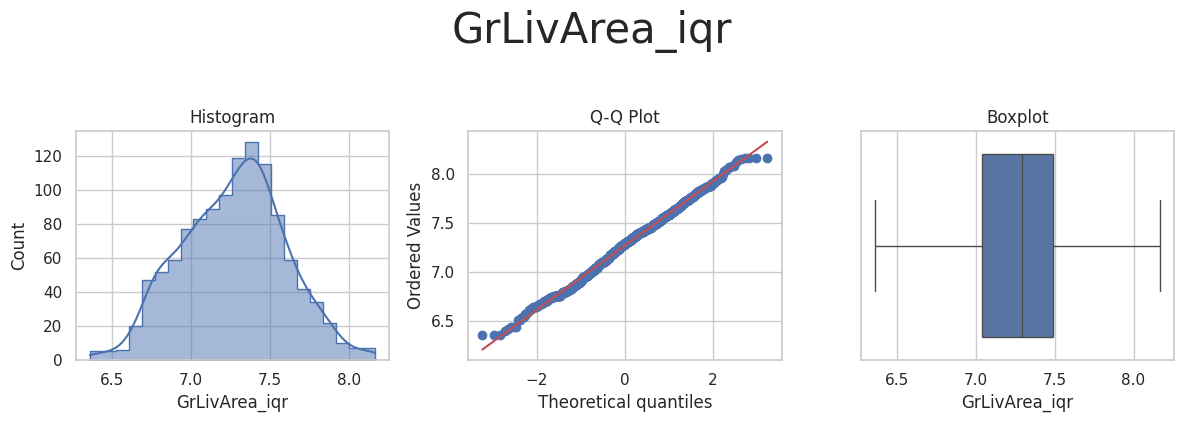



* Analysed Variable: BsmtFinSF1
* Transformation Applied: ['BsmtFinSF1_iqr'] 



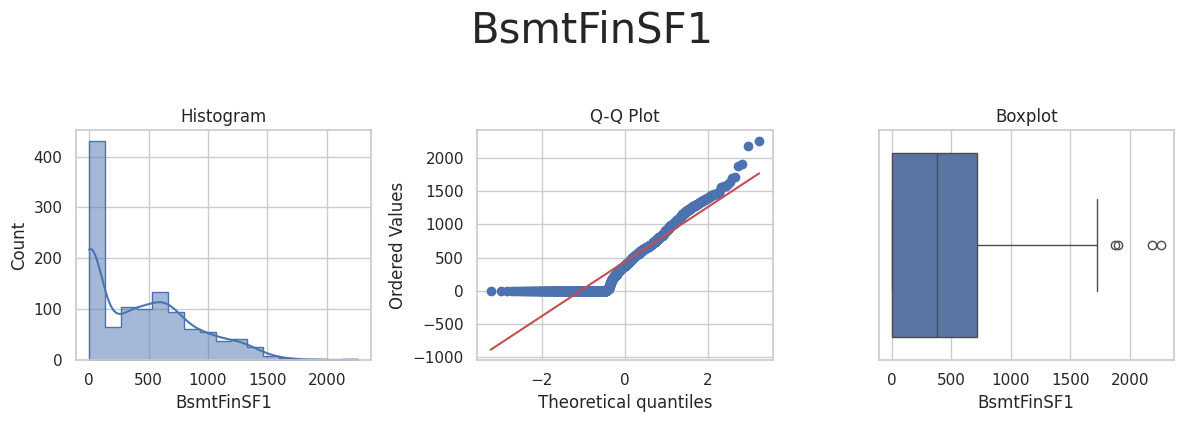

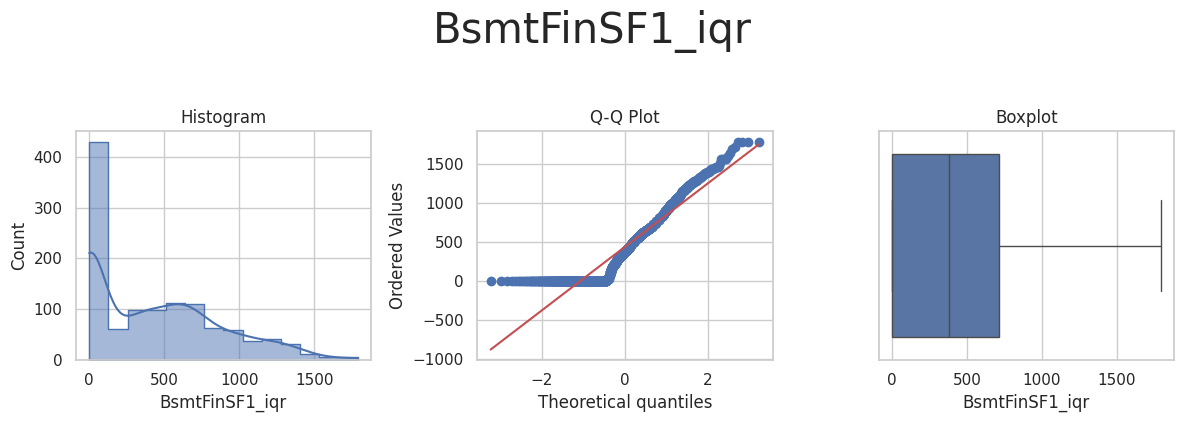



* Analysed Variable: BsmtUnfSF
* Transformation Applied: ['BsmtUnfSF_iqr'] 



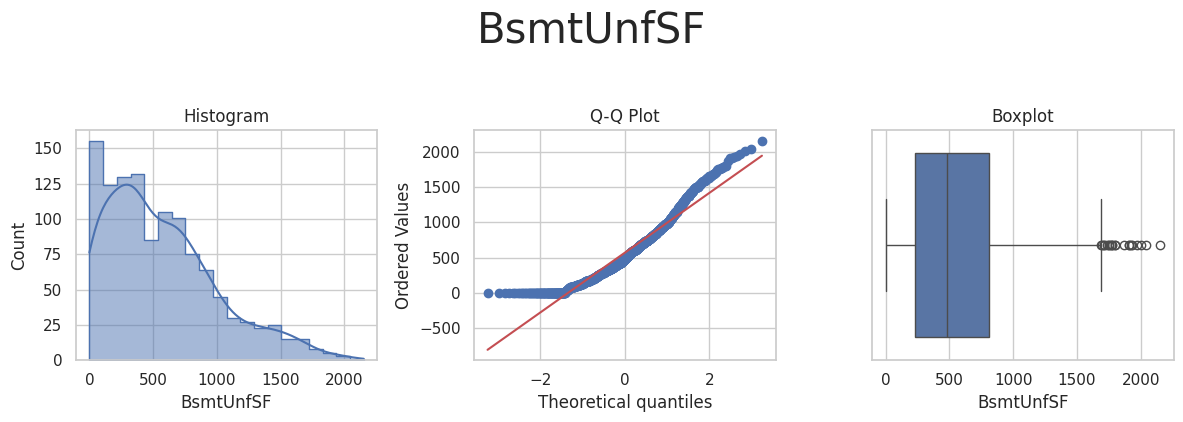

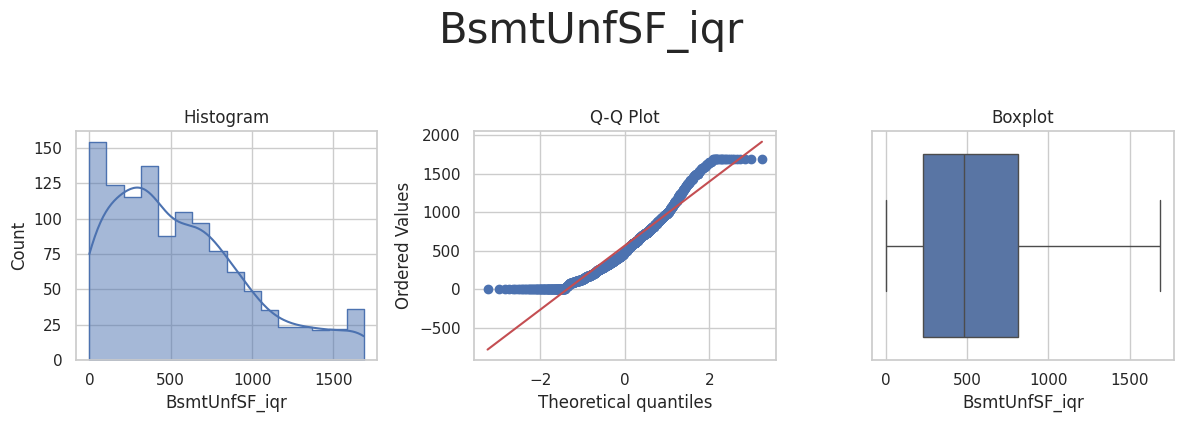



* Analysed Variable: TotalBsmtSF
* Transformation Applied: ['TotalBsmtSF_iqr'] 



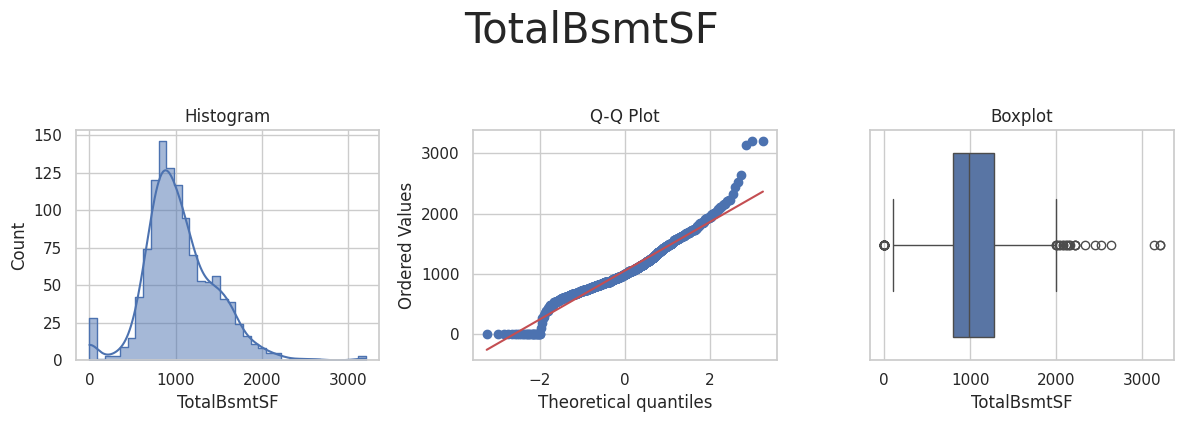

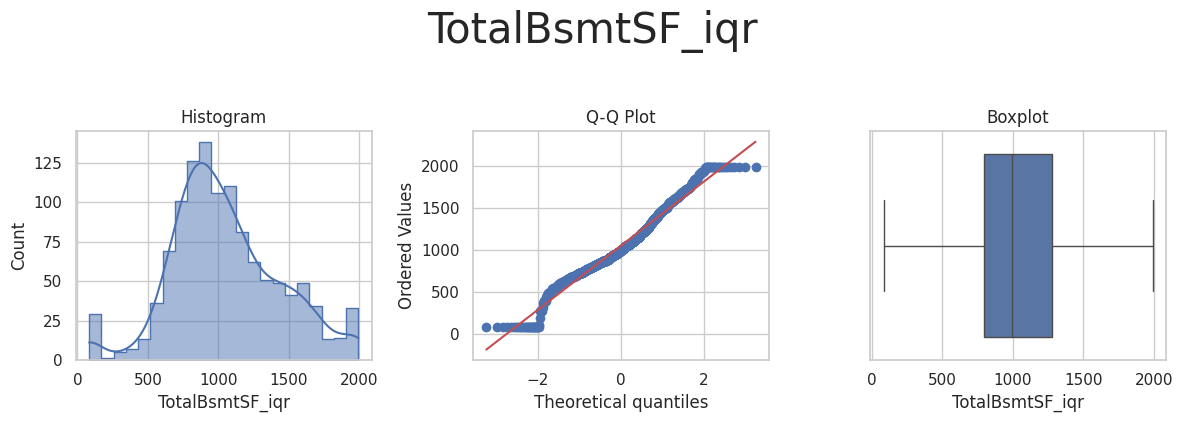



* Analysed Variable: GarageArea
* Transformation Applied: ['GarageArea_iqr'] 



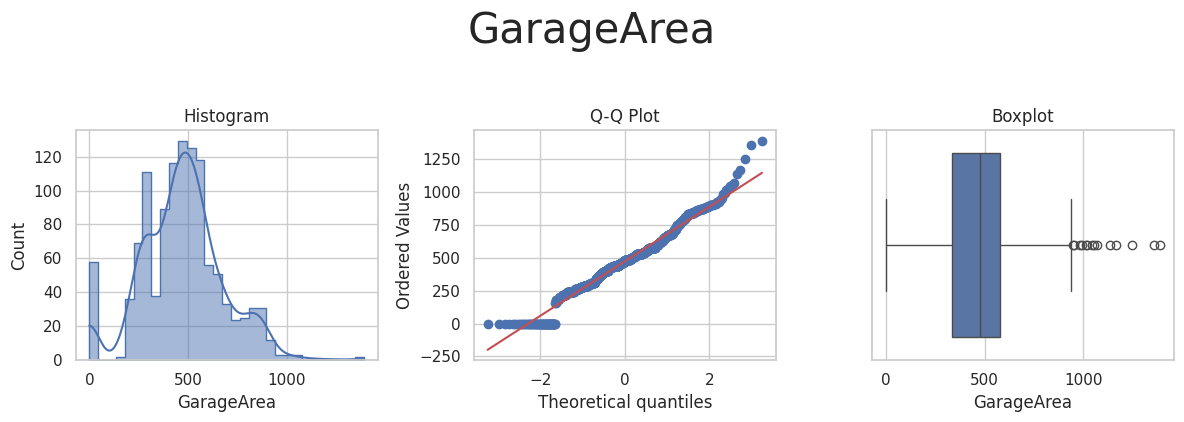

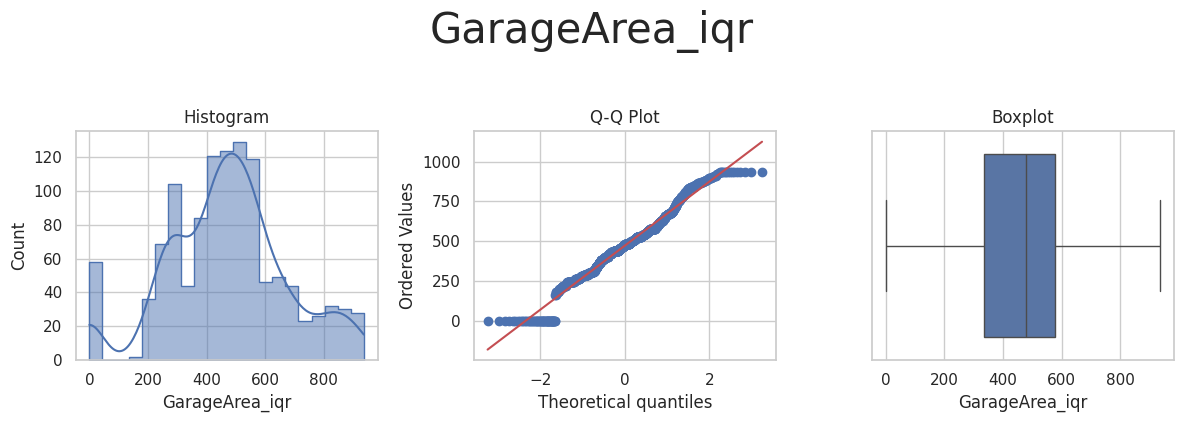



* Analysed Variable: LotArea
* Transformation Applied: ['LotArea_iqr'] 



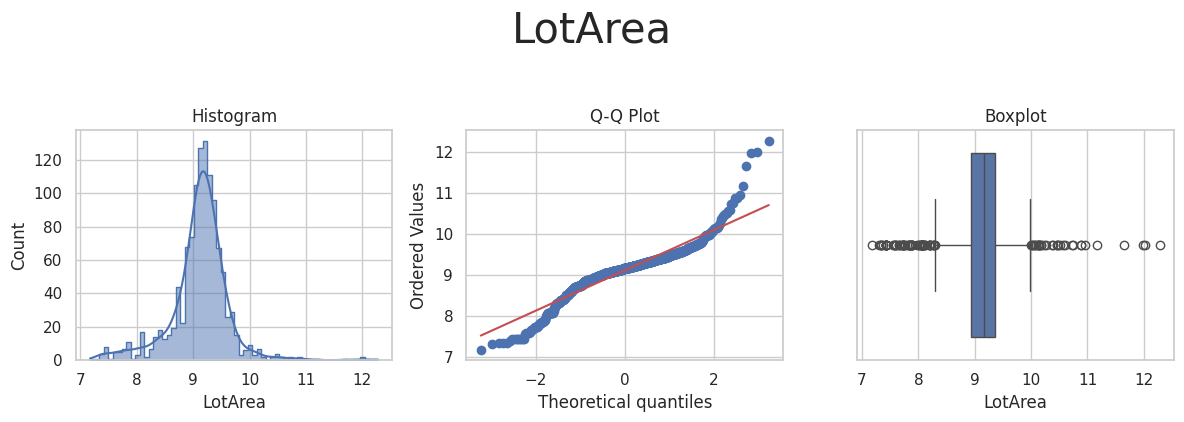

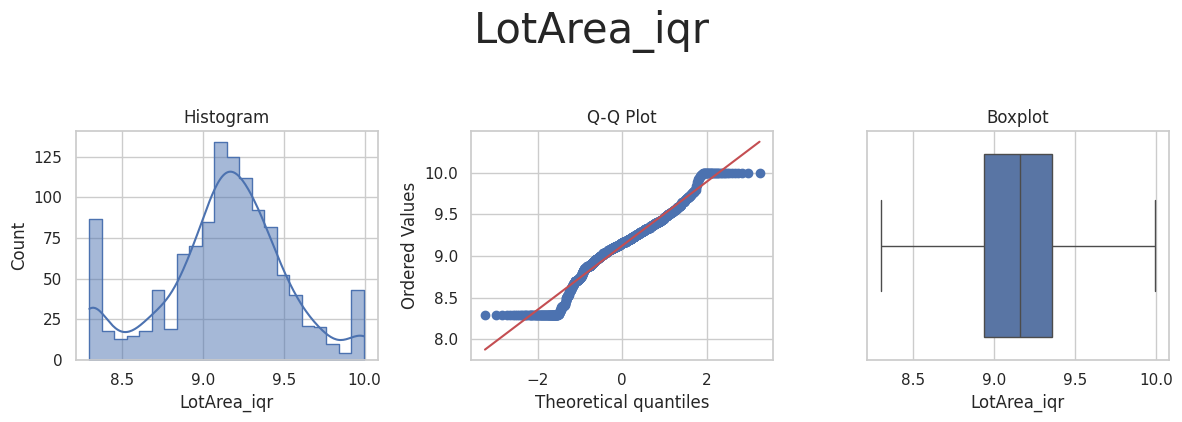



* Analysed Variable: LotFrontage
* Transformation Applied: ['LotFrontage_iqr'] 



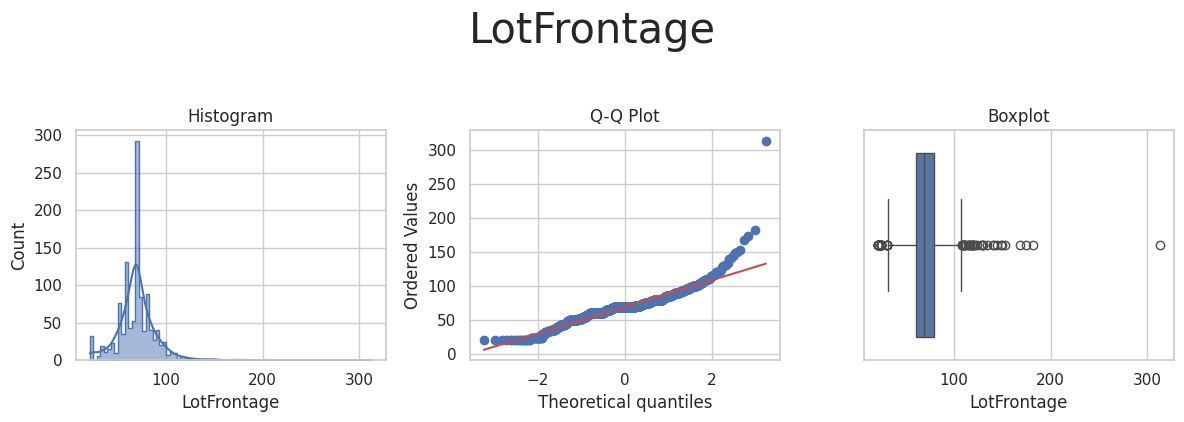

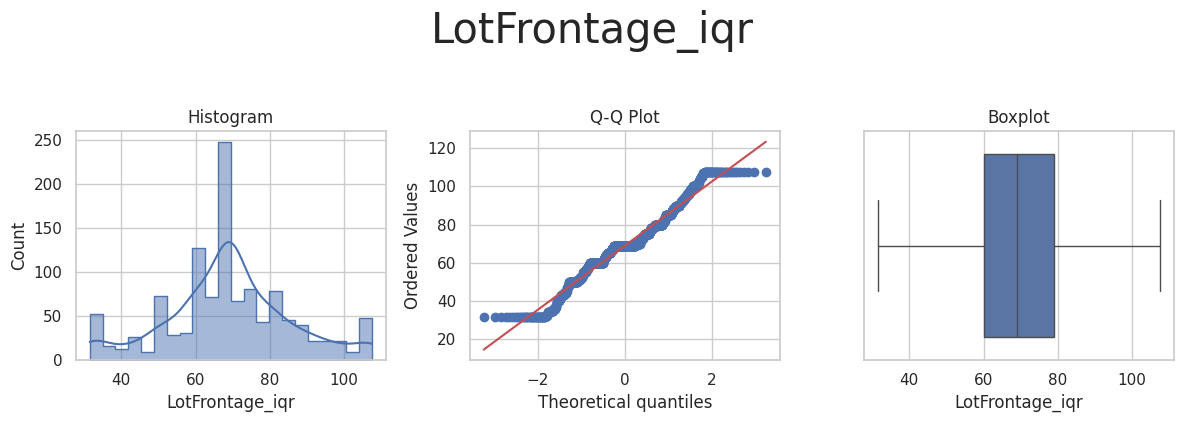



* Analysed Variable: MasVnrArea
* Transformation Applied: ['MasVnrArea_iqr'] 



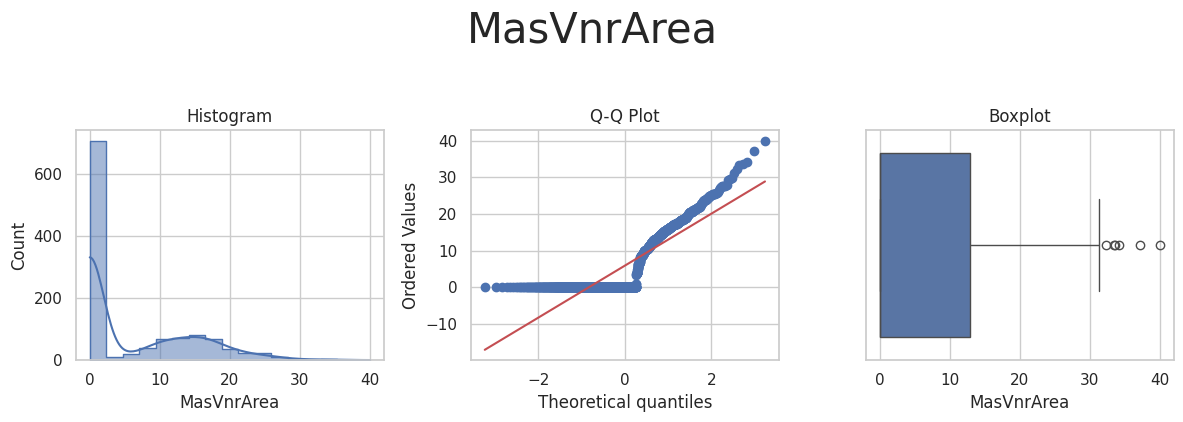

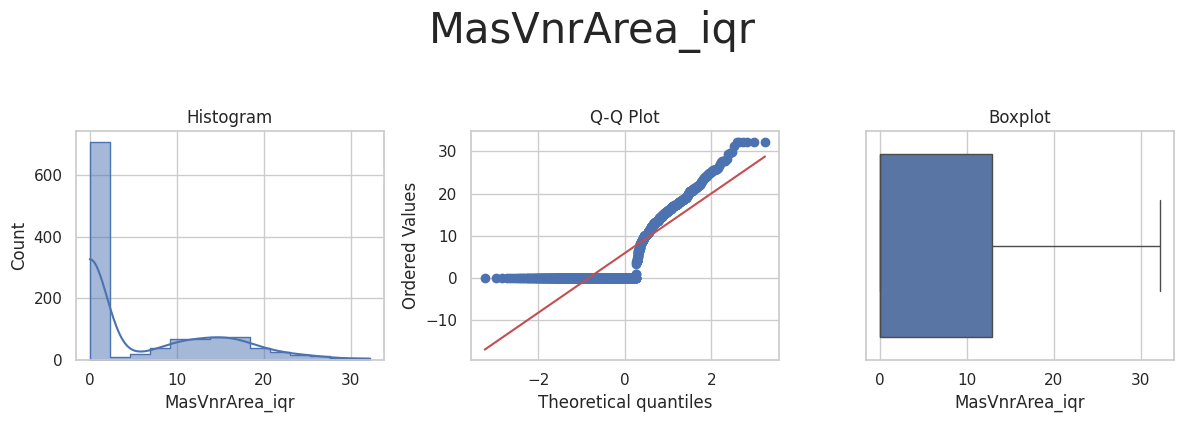



* Analysed Variable: SalePrice
* Transformation Applied: ['SalePrice_iqr'] 



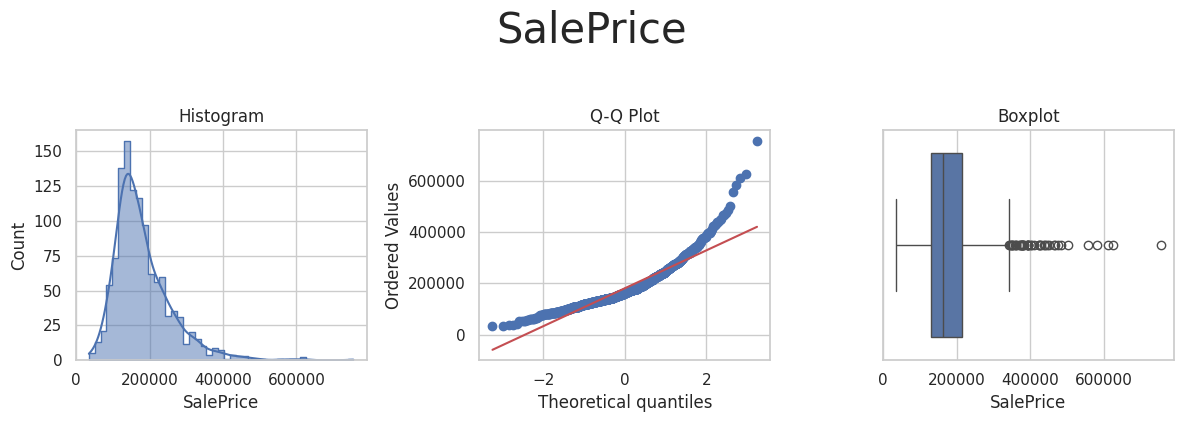

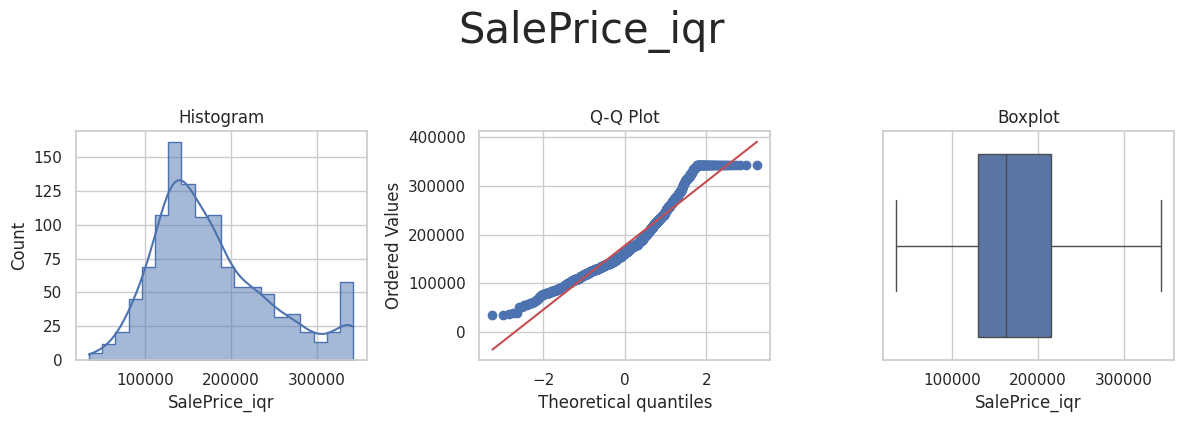

In [ ]:


winsoriser_vars = FeatureEngineeringAnalysis(df=winsoriser_vars, analysis_type='outlier_winsorizer')

### Findings:

* We can see that all the outliers were removed and overall this improved the distribution, therefore the transformer will be applied to all the variables.

    
Step 4: Finally we apply these transformations to our Train and Test Datasets:

* fold=1.5 was found to be the most effective

In [18]:
winsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['1stFlrSF', '2ndFlrSF', 'GrLivArea','BsmtFinSF1', 'BsmtUnfSF', 
                    'TotalBsmtSF', 'GarageArea', 'LotArea', 'LotFrontage', 
                    'MasVnrArea', 'SalePrice'])
TrainSet = winsoriser.fit_transform(TrainSet)
TestSet = winsoriser.fit_transform(TestSet)

print("* Outlier Winsoriser Transformations Done!")

* Outlier Winsoriser Transformations Done!


## SmartCorrelatedSelection Variables

Step 1: First we create a separate Dataframe and drop SalePrice:

In [19]:
df_smart_corr = TrainSet.drop(['SalePrice'], axis=1)
df_smart_corr.head(5)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0  7.510978       0.0           3.0           Av          48          Unf   
1  6.795706       0.0           2.0           No           0          Unf   
2  6.871091       0.0           2.0           No         713          ALQ   
3  7.431892       0.0           3.0           No        1218          GLQ   
4  7.340187       0.0           3.0           No           0          Unf   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  KitchenQual  \
0   1686.125         774          Unf       2007.0  ...           Gd   
1    894.000         308          Unf       1962.0  ...           TA   
2    163.000         432          Unf       1921.0  ...           TA   
3    350.000         857          RFn       2002.0  ...           Gd   
4   1541.000         843          RFn       2001.0  ...           Gd   

    LotArea  LotFrontage  MasVnrArea  OpenPorchSF  OverallCond  OverallQual  \
0  9.366831         90.0   21.260292     4.880037            5            9   
1  8.794825         60.0    0.000000     0.000000            5            5   
2  9.500020         80.0    0.000000     0.000000            7            5   
3  9.492884         69.0   12.165525     4.237583            5            8   
4  9.525443        107.5   12.247449     4.572940            5            7   

   TotalBsmtSF  YearBuilt  YearRemodAdd  
0       1822.0       2007          2007  
1        894.0       1962          1962  
2        876.0       1921          2006  
3       1568.0       2002          2002  
4       1541.0       2001          2002  

[5 rows x 21 columns]

Step 2: Next we create the engineered variables and apply the transformations:

In [20]:
from feature_engine.selection import SmartCorrelatedSelection
smart_corr = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="cardinality")

smart_corr.fit_transform(df_smart_corr)
smart_corr.correlated_feature_sets_

[{'1stFlrSF', 'TotalBsmtSF'},
 {'2ndFlrSF', 'GrLivArea'},
 {'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'}]

In [21]:
smart_corr.features_to_drop_

['2ndFlrSF', 'GarageYrBlt', 'TotalBsmtSF', 'YearRemodAdd']

### Findings:

Method: **spearman**

* variance -- [{'1stFlrSF', 'TotalBsmtSF'}, {'2ndFlrSF', 'GrLivArea'}, {'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'}]
* drop -- ['1stFlrSF', 'GarageYrBlt', 'GrLivArea', 'YearRemodAdd']
* cardinality -- [{'1stFlrSF', 'TotalBsmtSF'}, {'2ndFlrSF', 'GrLivArea'}, {'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'}]
* drop -- ['2ndFlrSF', 'GarageYrBlt', 'TotalBsmtSF', 'YearRemodAdd']

Method: **pearson**

* variance -- [{'1stFlrSF', 'TotalBsmtSF'}, {'2ndFlrSF', 'GrLivArea'}, {'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'}, {'LotArea', 'LotFrontage'}]
* drop -- ['1stFlrSF', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'YearRemodAdd']
* cardinality -- [{'1stFlrSF', 'TotalBsmtSF'}, {'2ndFlrSF', 'GrLivArea'}, {'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'}, {'LotArea', 'LotFrontage'}]
* drop -- ['2ndFlrSF', 'GarageYrBlt', 'LotFrontage', 'TotalBsmtSF', 'YearRemodAdd']

After analysing different combinations of results, the variables chosen to be dropped are: ['2ndFlrSF', 'GarageYrBlt', 'TotalBsmtSF', 'YearRemodAdd'] as they will not benefit the ML model.

---

## Conclusions and Next Steps

* Categorical Encoding completed on: ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

* Numerical Transformations completed on:  ['1stFlrSF', 'GrLivArea', 'LotArea', 'MasVnrArea', 'OpenPorchSF']

* Outlier Winsoriser Transformations completed on:  ['1stFlrSF', '2ndFlrSF', 'GrLivArea','BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'SalePrice']

* Variables to drop after SmartCorrelation: ['2ndFlrSF', 'GarageYrBlt', 'TotalBsmtSF', 'YearRemodAdd']

Next we will create the Machine Learning Model.

